In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [6]:
from google.colab import files
uploaded = files.upload()
#df=pd.read_csv(r'C:\Users\sruti\Desktop\capstone\sample30.csv')

Saving sample30.csv to sample30.csv


In [7]:
import io
df = pd.read_csv(io.BytesIO(uploaded['sample30.csv']))

In [8]:
df['Feedback'] = df.copy()['reviews_title']+" "+df.copy()['reviews_text']

In [9]:
df.drop(['reviews_title','reviews_text'],axis=1,inplace=True)
df.head()

id  ...                                           Feedback
0  AV13O1A8GV-KLJ3akUyj  ...  Just Awesome i love this album. it's very good...
1  AV14LG0R-jtxr-f38QfS  ...  Good Good flavor. This review was collected as...
2  AV14LG0R-jtxr-f38QfS  ...                                  Good Good flavor.
3  AV16khLE-jtxr-f38VFn  ...  Disappointed I read through the reviews on her...
4  AV16khLE-jtxr-f38VFn  ...  Irritation My husband bought this gel for us. ...

[5 rows x 14 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_userCity      1929 non-null   object
 10  reviews_userProvince  170 non-null    object
 11  reviews_username      29937 non-null  object
 12  user_sentiment        29999 non-null  object
 13  Feedback              29810 non-null  object
dtypes: int64(1), object(13)
memory usage: 3.2+ MB


In [11]:
df.describe()

reviews_rating
count    30000.000000
mean         4.483133
std          0.988441
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000

In [12]:
df['reviews_rating'].value_counts()

5    20831
4     6020
1     1384
3     1345
2      420
Name: reviews_rating, dtype: int64

In [13]:
# missing values
round(100*(df.isnull().sum())/len(df), 2)

id                       0.00
brand                    0.00
categories               0.00
manufacturer             0.47
name                     0.00
reviews_date             0.15
reviews_didPurchase     46.89
reviews_doRecommend      8.57
reviews_rating           0.00
reviews_userCity        93.57
reviews_userProvince    99.43
reviews_username         0.21
user_sentiment           0.00
Feedback                 0.63
dtype: float64

In [14]:
df.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
Feedback                  190
dtype: int64

In [15]:
# Write your code for to find the columns which have null percenatge more than 40 here
indexm=(round(100*(df.isnull().sum()/len(df.index)),2)>=40)
df_t = indexm.to_frame("columns")
cols_to_drop = df_t[df_t["columns"]==True].index.to_list()

In [16]:
cols_to_drop

['reviews_didPurchase', 'reviews_userCity', 'reviews_userProvince']

In [17]:
len(cols_to_drop)

3

In [18]:
#Dropping the columns which have null percentage more than 40
df.drop(columns=cols_to_drop,inplace=True)

In [19]:
# missing values
round(100*(df.isnull().sum())/len(df), 2)

id                     0.00
brand                  0.00
categories             0.00
manufacturer           0.47
name                   0.00
reviews_date           0.15
reviews_doRecommend    8.57
reviews_rating         0.00
reviews_username       0.21
user_sentiment         0.00
Feedback               0.63
dtype: float64

In [20]:
## FILLING NULL VALUES IN manufacturer NAME WITH FIRST WORD FROM brand
##########################################

df.loc[df.manufacturer.isnull(),'manufacturer'] = df.brand

In [26]:
df[df['manufacturer'].isnull()]

Empty DataFrame
Columns: [id, brand, categories, manufacturer, name, reviews_date, reviews_doRecommend, reviews_rating, reviews_username, user_sentiment, Feedback]
Index: []

In [27]:
# Droping the rows which have null percentage

In [28]:
## DROPPING NULL VALUE COLUMNS
##########################################

df=df.dropna(subset=['reviews_doRecommend','reviews_username','reviews_date','Feedback'])

In [29]:
round(100*(df.isnull().sum())/len(df), 2)

id                     0.0
brand                  0.0
categories             0.0
manufacturer           0.0
name                   0.0
reviews_date           0.0
reviews_doRecommend    0.0
reviews_rating         0.0
reviews_username       0.0
user_sentiment         0.0
Feedback               0.0
dtype: float64

In [30]:
## Checking for duplicates:

In [31]:
print('Entry duplicates: {}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace = True)

Entry duplicates: 14


In [32]:
print('Entry duplicates: {}'.format(df.duplicated().sum()))

Entry duplicates: 0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27358 entries, 3 to 29999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   27358 non-null  object
 1   brand                27358 non-null  object
 2   categories           27358 non-null  object
 3   manufacturer         27358 non-null  object
 4   name                 27358 non-null  object
 5   reviews_date         27358 non-null  object
 6   reviews_doRecommend  27358 non-null  object
 7   reviews_rating       27358 non-null  int64 
 8   reviews_username     27358 non-null  object
 9   user_sentiment       27357 non-null  object
 10  Feedback             27358 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.5+ MB


In [34]:

## DESCRIPTIVE STATISTICS
##########################################

print ("================================================")

### Total reviews
total = len(df)
print ("Number of reviews: ",total)
print ()

### How many unique reviewers?
print ("Number of unique reviewers: ",len(df.reviews_username.unique()))
reviewer_prop = float(len(df.reviews_username.unique())/total)
print ("Prop of unique reviewers: ",round(reviewer_prop,3))
print ()

### How many unique products?
print ("Number of unique products: ", len(df.name.unique()))
product_prop = float(len(df.name.unique())/total)
print ("Prop of unique products: ",round(product_prop,3))
print ()

### Average star score
print ("Average rating score: ",round(df.reviews_rating.mean(),3))

print ("================================================")

Number of reviews:  27358

Number of unique reviewers:  23122
Prop of unique reviewers:  0.845

Number of unique products:  206
Prop of unique products:  0.008

Average rating score:  4.547


In [35]:
df.describe()

reviews_rating
count    27358.000000
mean         4.546714
std          0.885890
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000

Text(0, 0.5, 'Number of Reviews')

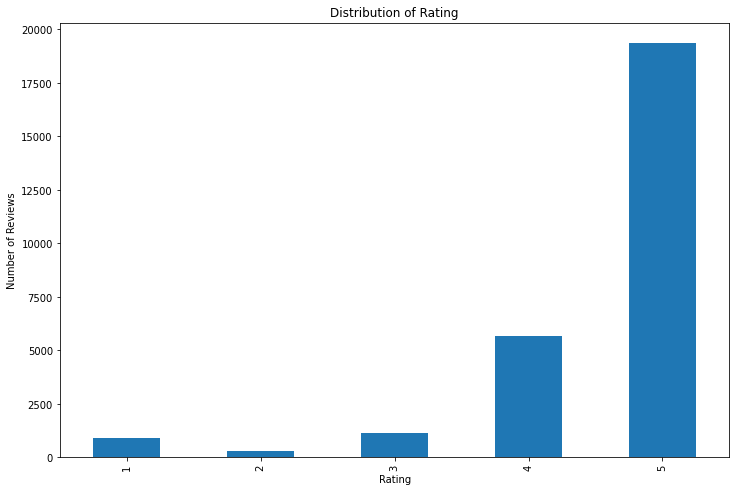

In [36]:
##########################################
## PLOT DISTRIBUTION OF RATING 
##########################################

plt.figure(figsize=(12,8))
df['reviews_rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

In [37]:
##########################################
## DISTRIBUTION OF RATING SCORE
########################################## 

class_counts = df.groupby('reviews_rating').size()
class_counts

reviews_rating
1      886
2      294
3     1147
4     5681
5    19350
dtype: int64

In [38]:
##########################################
# Customer totals for each rating class
##########################################
df['reviews_rating'].value_counts()

5    19350
4     5681
3     1147
1      886
2      294
Name: reviews_rating, dtype: int64

# Bag of Words
* The goal of this project is to classify the reviews into positive and negative sentiment. There are two main steps involved. First, we need to find a word embedding to convert a text into a numerical representation. Second, we fit the numerical representations of text to machine learning algorithms or deep learning architectures.

* One common approach of word embedding is frequency based embedding such as Bag of Words (BoW) model. BoW model learns a vocubulary list from a given corpus and represents each document based on some counting methods of words. In this part, we will explore the model performance of using BoW with supervised learning algorithms. Here's the workflow in this part.

* 1 : Preprocess raw reviews to cleaned reviews
* 2 : Create BoW using CountVectorizer / Tfidfvectorizer in sklearn
* 3 : Transform review text to numerical representations (feature vectors)
* 4 : Fit feature vectors to supervised learning algorithm (eg. Naive Bayes, Logistic regression, etc.)
* 5 : Improve the model performance by GridSearch

## Text Preprocessing
* The following text preprocessing are implemented to convert raw reviews to cleaned review, so that it will be easier for us to do feature extraction in the next step.

In [39]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import unicodedata
#from pycontractions import Contractions
#import contractions
#from contractions import contractions_dict
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize 
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [40]:
# calculate raw tokens in order to measure of cleaned tokens

from nltk.tokenize import word_tokenize
raw_tokens=len([w for t in (df["Feedback"].apply(word_tokenize)) for w in t])
print('Number of raw tokens: {}'.format(raw_tokens))

Number of raw tokens: 1091127


# Functions for Preprocessing
* ## Expanding Contractions
Contractions are shortened version of words or syllables. They exist in either written or spoken forms. Shortened versions of existing words are created by removing specific letters and sounds. In case of English contractions, they are often created by removing one of the vowels from the word.

 By nature, contractions do pose a problem for NLP and text analytics because, to start with, we have a special apostrophe character in the word. Ideally, we can have a proper mapping for contractions and their corresponding expansions and then use it to expand all the contractions in our text.

* ## Removing Special Characters
One important task in text normalization involves removing unnecessary and special characters. These may be special symbols or even punctuation that occurs in sentences. This step is often performed before or after tokenization. The main reason for doing so is because often punctuation or special characters do not have much significance when we analyze the text and utilize it for extracting features or information based on NLP and ML.

* ## Tokenizing Text
 Tokenization can be defined as the process of breaking down or splitting textual data into smaller meaningful components called tokens.
 
  Sentence tokenization is the process of splitting a text corpus into sentences that act as the first level of tokens which the corpus is comprised of. This is also known as sentence segmentation , because we try to segment the text into meaningful sentences.
 
  Word tokenization is the process of splitting or segmenting sentences into their constituent words. A sentence is a collection of words, and with tokenization we essentially split a sentence into a list of words that can be used to reconstruct the sentence.

* ## Removing Stopwords
Stopwords are words that have little or no significance. They are usually removed from text during processing so as to retain words having maximum significance and context. Stopwords are usually words that end up occurring the most if you aggregated any corpus of text based on singular tokens and checked their frequencies. Words like a, the , me , and so on are stopwords.

* ## Correcting Words
One of the main challenges faced in text normalization is the presence of incorrect words in the text. The definition of incorrect here covers words that have spelling mistakes as well as words with several letters repeated that do not contribute much to its overall significance.

 * Correcting Repeating Characters
 * Correcting Spellings

* ## Lemmatization
The process of lemmatization is to remove word affixes to get to a base form of the word. The base form is also known as the root word, or the lemma, will always be present in the dictionary.

In [41]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

# special_characters removal
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text


def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


def remove_punctuation_and_splchars(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_word = remove_special_characters(new_word, True)
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

stopword_list= stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')
#stopword_list.remove('headphone')
#stopword_list.remove('headphones')
#stopword_list.remove('earbuds')
#stopword_list.remove('bud')
#stopword_list.remove('ear')
#stopword_list.remove('sony')
#stopword_list.remove('product')


def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopword_list:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation_and_splchars(words)
    words = remove_stopwords(words)
    return words

def lemmatize(words):
    lemmas = lemmatize_verbs(words)
    return lemmas

In [42]:
def normalize_and_lemmaize(input):
    sample = denoise_text(input)
    #sample = expand_contractions(sample)
    sample = remove_special_characters(sample)
    words = nltk.word_tokenize(sample)
    words = normalize(words)
    lemmas = lemmatize(words)
    return ' '.join(lemmas)

In [43]:
df['clean_feedback'] = df['Feedback'].map(lambda text: normalize_and_lemmaize(text))

In [44]:
df.head()

id  ...                                     clean_feedback
3  AV16khLE-jtxr-f38VFn  ...  disappoint read review look buy one couple lub...
4  AV16khLE-jtxr-f38VFn  ...  irritation husband buy gel us gel cause irrita...
5  AV16khLE-jtxr-f38VFn  ...  not worth boyfriend buy spice things bedroom h...
6  AV16khLE-jtxr-f38VFn  ...  disappoint buy earlier today excite check base...
7  AV16khLE-jtxr-f38VFn  ...  not happy buy product husband try not impress ...

[5 rows x 12 columns]

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27358 entries, 3 to 29999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   27358 non-null  object
 1   brand                27358 non-null  object
 2   categories           27358 non-null  object
 3   manufacturer         27358 non-null  object
 4   name                 27358 non-null  object
 5   reviews_date         27358 non-null  object
 6   reviews_doRecommend  27358 non-null  object
 7   reviews_rating       27358 non-null  int64 
 8   reviews_username     27358 non-null  object
 9   user_sentiment       27357 non-null  object
 10  Feedback             27358 non-null  object
 11  clean_feedback       27358 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.7+ MB


# Cleaning the Text

In [46]:
from nltk.tokenize import word_tokenize
clean_tokens=len([w for t in (df["clean_feedback"].apply(word_tokenize)) for w in t])
#clean_tokens=len((product_reviews_hp4["clean_text"]))
print('Number of clean tokens: {}\n'.format(clean_tokens))
print('Percentage of removed tokens: {0:.2f}'.format(1-(clean_tokens/raw_tokens)))

Number of clean tokens: 514567

Percentage of removed tokens: 0.53


In [47]:
### 1.  "Product" Feature

Text(0, 0.5, 'Number of Reviews')

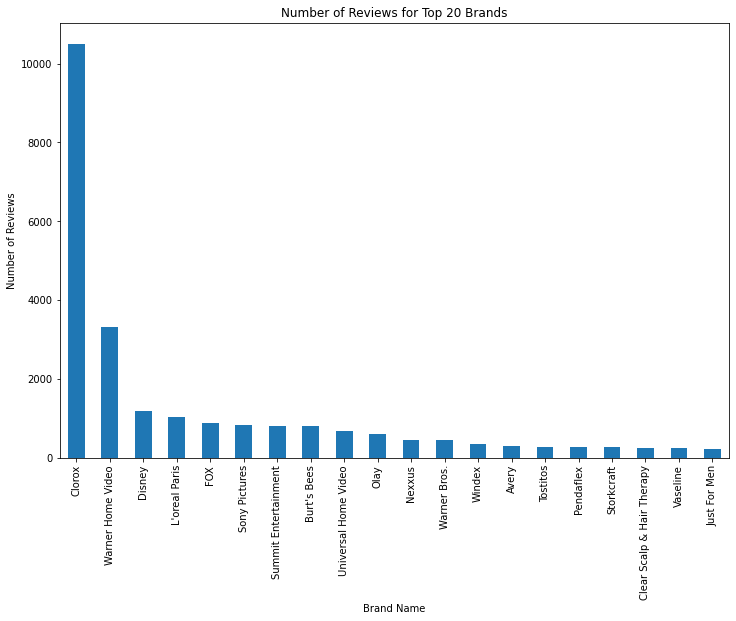

In [48]:
## PLOT NUMBER OF REVIEWS FOR TOP 20 BRANDS  
##########################################

brands = df["brand"].value_counts()
plt.figure(figsize=(12,8))
brands[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 20 Brands")
plt.xlabel('Brand Name')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

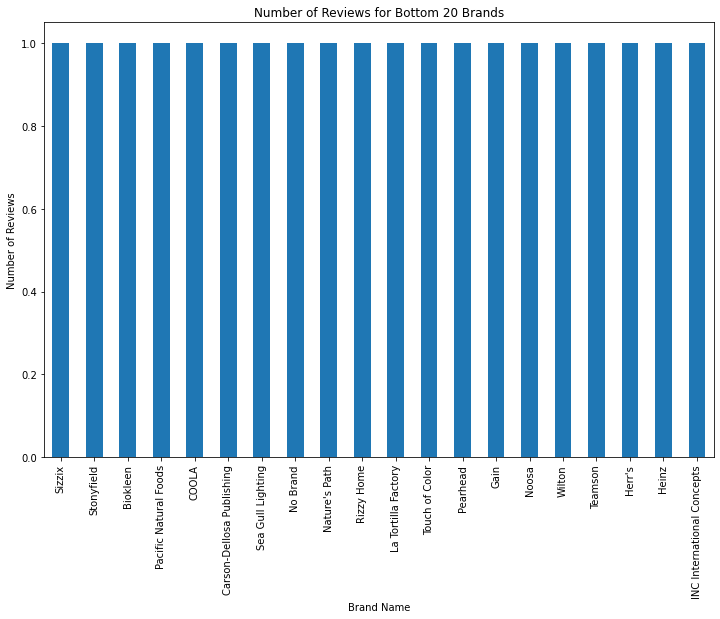

In [49]:
## PLOT NUMBER OF REVIEWS FOR BOTTOM 20 BRANDS  
##########################################

brands = df["brand"].value_counts()
# brands.count()
plt.figure(figsize=(12,8))
brands[-20:].plot(kind='bar')
plt.title("Number of Reviews for Bottom 20 Brands")
plt.xlabel('Brand Name')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

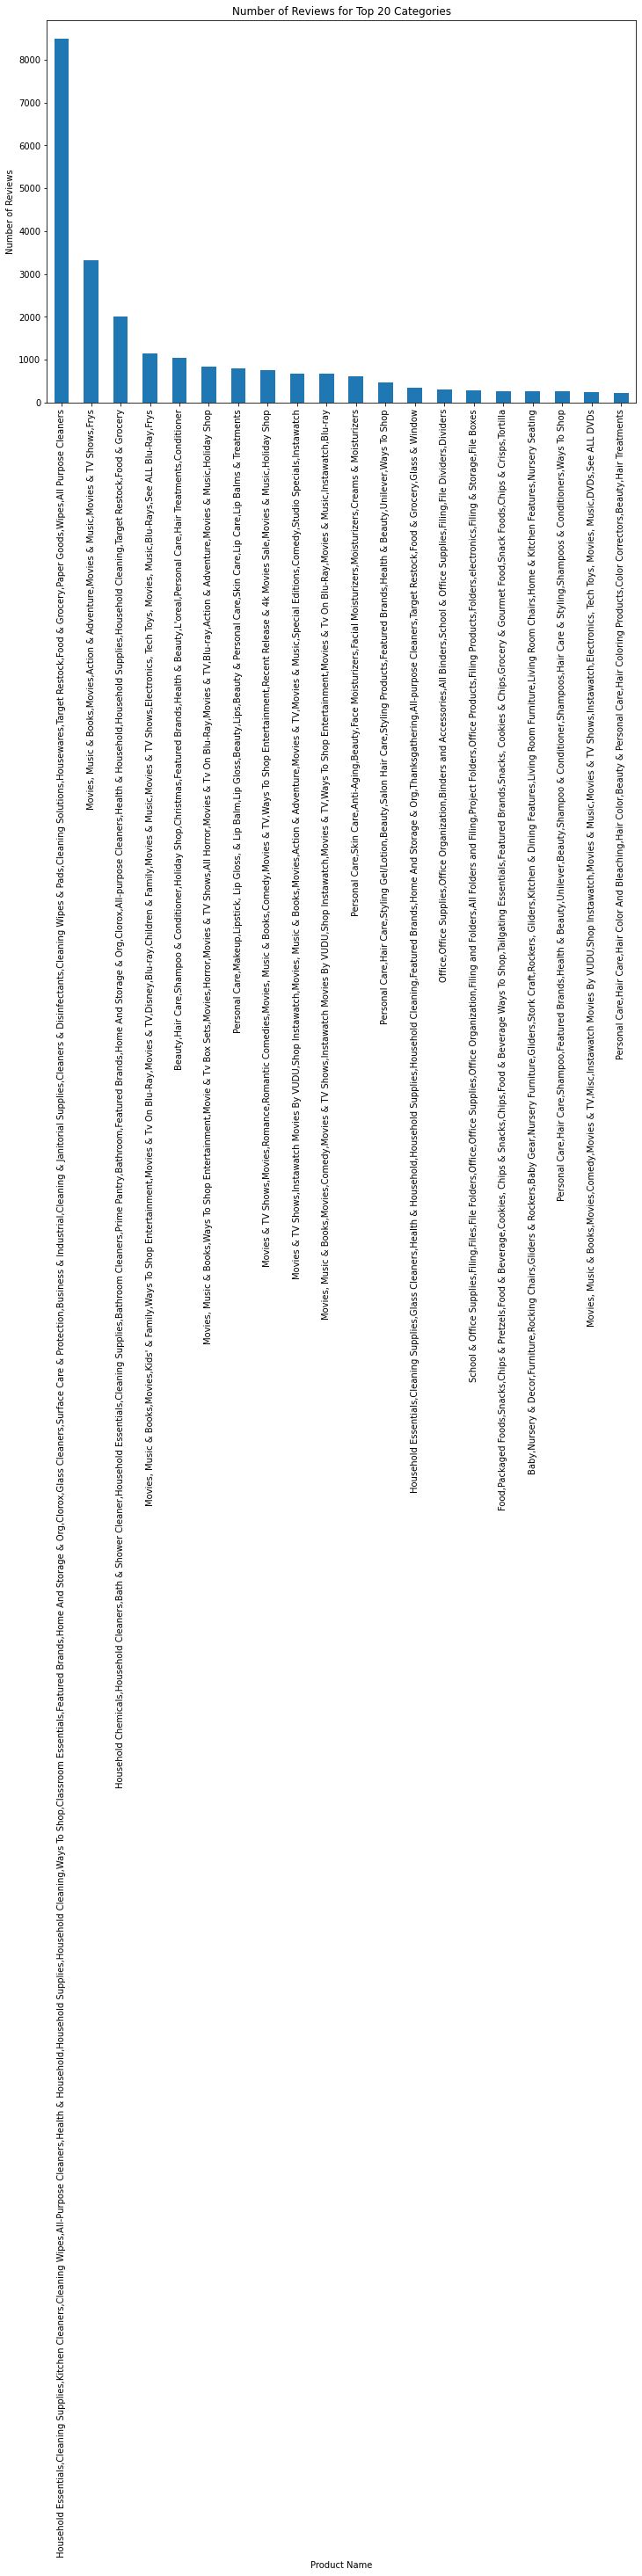

In [50]:
## PLOT NUMBER OF REVIEWS FOR TOP 20 categories  
##########################################

products = df["categories"].value_counts()
plt.figure(figsize=(12,8))
products[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 20 Categories")
plt.xlabel('Product Name')
plt.ylabel('Number of Reviews')

In [51]:
df1=df.copy()

In [52]:
from nltk.tokenize import RegexpTokenizer
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

ListWords = []
for m in df1['clean_feedback']:
    n = RegExpTokenizer(str(m))
    ListWords.append(n)
print(ListWords[10])

['not', 'happy', 'product', 'buy', 'really', 'like', 'n', 'variety', 'nothing', 'like', 'disappoint', 'product']


In [53]:
from nltk import FreqDist
def Bag_Of_Words(ListWords):
    all_words = []
    for m in ListWords:
        for w in m:
            all_words.append(w.lower())
    all_words1 = FreqDist(all_words)
    return all_words1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


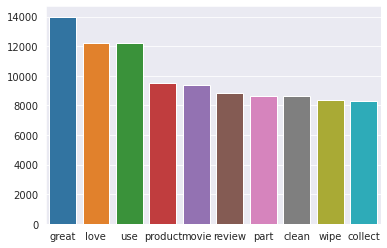

In [54]:
import seaborn as sns
from sklearn.manifold import TSNE
all_words4 = Bag_Of_Words(ListWords)
count = []
Words  = []
for w in all_words4.most_common(10):
    count.append(w[1])
    Words.append(w[0])
sns.set_style("darkgrid")
sns.barplot(Words,count)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


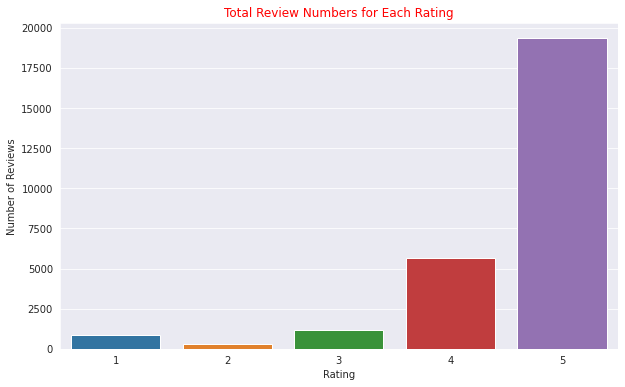

5    19350
4     5681
3     1147
1      886
2      294
Name: reviews_rating, dtype: int64

In [55]:
# Total numbers of ratings in the home and kitchen product reviews
plt.figure(figsize = (10,6))
sns.countplot(df['reviews_rating'])
plt.title('Total Review Numbers for Each Rating', color='r')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
df['reviews_rating'].value_counts()

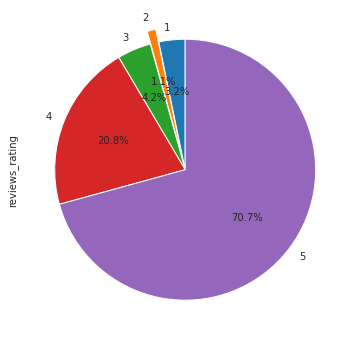

In [56]:
plt.figure(figsize = (10,6))

df.groupby('reviews_rating').reviews_rating.count()
df.groupby('reviews_rating').reviews_rating.count().plot(kind='pie',autopct='%1.1f%%',startangle=90,explode=(0,0.1,0,0,0),)

In [57]:
word_count=[]
for s1 in df.Feedback:
    word_count.append(len(str(s1).split()))

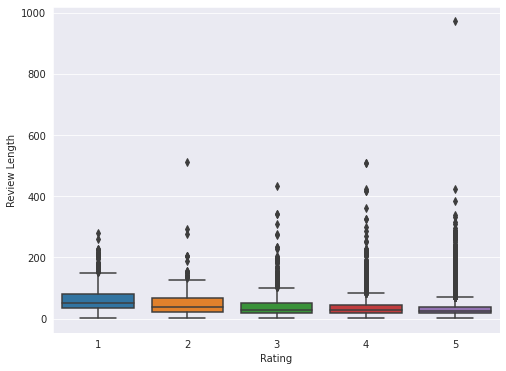

In [58]:
plt.figure(figsize = (8,6))

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="reviews_rating",y=word_count,data=df)
plt.xlabel('Rating')
plt.ylabel('Review Length')

plt.show()

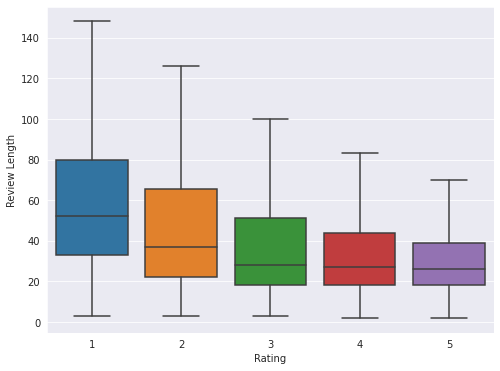

In [59]:
plt.figure(figsize = (8,6))

sns.boxplot(x="reviews_rating",y=word_count,data=df,showfliers=False)
plt.xlabel('Rating')
plt.ylabel('Review Length')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


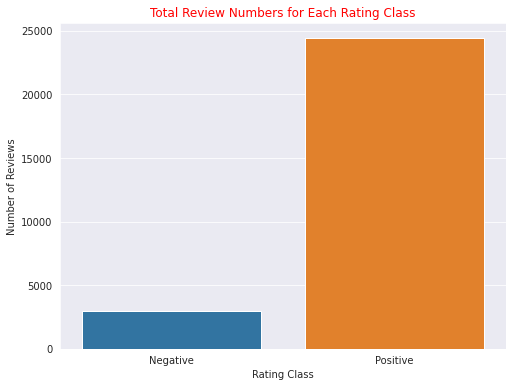

Positive    24422
Negative     2935
Name: user_sentiment, dtype: int64

In [60]:
# Total numbers of ratings in the home and kitchen product reviews
plt.figure(figsize = (8,6))
sns.countplot(df['user_sentiment'])
plt.title('Total Review Numbers for Each Rating Class', color='r')
plt.xlabel('Rating Class')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
df['user_sentiment'].value_counts()

In [61]:
# How many unique customers do we have in the dataset?
print('Number of unique customers: {}'.format(len(df1['reviews_username'].unique())))

Number of unique customers: 23122


In [62]:
a = list(df1.groupby(['user_sentiment'])['id'].unique())  

# number of customers
a2 = [len(a[0]),len(a[1])] 

# number of reviews for each "rating class"
b = list(df1['user_sentiment'].value_counts())              

uniq_cust_rate = pd.DataFrame({'rating_class': ['negative', 'positive'],
                               'number_of_customers': a2,
                               'number_of_reviews': sorted(b)})
print(uniq_cust_rate)

  rating_class  number_of_customers  number_of_reviews
0     negative                  131               2935
1     positive                  202              24422


Text(0, 0.5, 'Number of Reviews')

<Figure size 1080x576 with 0 Axes>

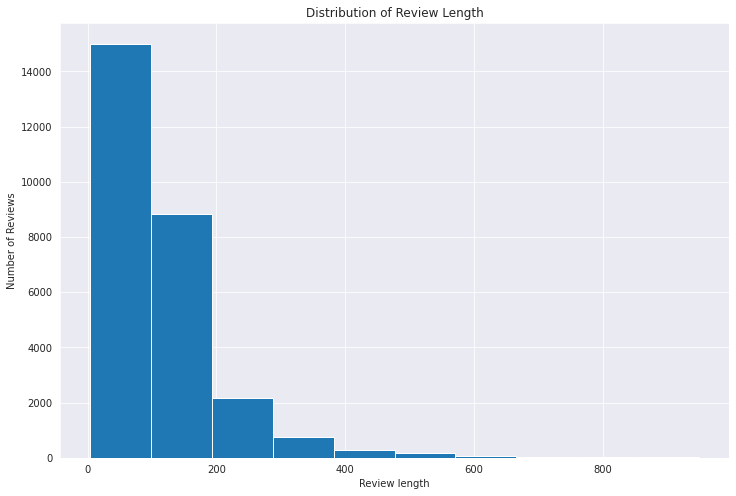

In [63]:
##########################################
## PLOT DISTRIBUTION OF REVIEW LENGTH   
##########################################
plt.figure(figsize = (15,8))

review_length = df1["clean_feedback"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 1000].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length')
plt.ylabel('Number of Reviews')

In [64]:
review_length.describe()

count    27358.000000
mean       118.838548
std         97.393371
min          4.000000
25%         65.000000
50%         92.000000
75%        140.000000
max       3681.000000
Name: clean_feedback, dtype: float64

In [65]:
def token (text):
    token = [w for w in nltk.word_tokenize(text)]
    return token

# To create token feature
df['token'] = df['clean_feedback'].apply(token)

In [66]:
# Function for creating a column to see the length of the review text
def length(text):
    length = len([w for w in nltk.word_tokenize(text)])
    return length

# Apply length function to create review length feature
df['review_length'] = df['Feedback'].apply(length)
df.head(3)

id  ... review_length
3  AV16khLE-jtxr-f38VFn  ...           144
4  AV16khLE-jtxr-f38VFn  ...            30
5  AV16khLE-jtxr-f38VFn  ...            58

[3 rows x 14 columns]

In [67]:
df['user_sentiment'] = df['user_sentiment'].apply(lambda x: 1 if x =='Positive' else 0)

# Sentiment Analysis (CV-TF_IDF)

### Import necessary libraries

In [68]:
import itertools

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Datetime
from datetime import datetime

# text preprocessing
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import gensim
import re


import unicodedata
tokenizer = ToktokTokenizer()
nlp = spacy.load('en_core_web_sm', parse=True, tag=True, entity=True)

## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
#from catboost import CatBoostClassifier, Pool
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from gensim.models import Word2Vec
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier
#from sklearn.dummy import DummyClassifier

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [69]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [70]:
df2=df.copy()

In [71]:
# Drop unnecessary columns
df2 = df2.drop(['brand','categories','manufacturer','name','reviews_date','reviews_doRecommend','reviews_rating','review_length'], axis=1)

# Natural Language Processing
## 1. Feature Engineering and Selection
* Machine Learning models take numerical values as input. Our dataset is a list of sentences, so in order for our algorithm to extract patterns from the data, we first need to find a way to represent it in a way that our algorithm can understand, i.e. as a list of numbers.

* We will implement CounterVectorizer, TF-IDF, and  Word2Vec, adding most common words into the stopwords list, SMOTE, PCA, and Truncated SVD techniques into our models in the following sections as a part of feature engineering and selection.

# 2. Data Preprocessing
## Separating Response Variable and Feature

In [72]:
df1['user_sentiment'].value_counts()

Positive    24422
Negative     2935
Name: user_sentiment, dtype: int64

In [73]:
df2['user_sentiment'].value_counts()

1    24422
0     2936
Name: user_sentiment, dtype: int64

In [74]:
#df2['user_sentiment'] = df2['user_sentiment'].apply(lambda x: 1 if x =='Positive' else 0)

In [75]:

# Splitting the Data Set into Train and Test Sets
X = df2['clean_feedback']
y = df2['user_sentiment']

In [76]:
df2['user_sentiment'].value_counts()

1    24422
0     2936
Name: user_sentiment, dtype: int64

In [77]:
y.head()

3    0
4    0
5    0
6    0
7    0
Name: user_sentiment, dtype: int64

# Splitting Dataset into Train and Test Set
We split our data in to a training set used to fit our model and a test set to see how well it generalizes to unseen data.

In [78]:
# Splitting Dataset into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [79]:
# Print train and test set shape
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train.shape, X_test.shape))

Train Set Shape		:(19150,)
Test Set Shape		:(8208,)


# 3. Selecting the Right Evaluation Metric
Since the data is imbalanced, the evaluation of the classifier performance must be carried out using adequate metrics in order to take into account the class distribution and to pay more attention to the minority class. When the positive class is smaller and the ability to detect correctly positive samples is our main focus (correct detection of negatives examples is less important to the problem) we should use precision and recall. For our particular case, based on this thought I will use f1 score which is harmonic average of precision and recall as my evaluation metric.

##  Confusion Matrix Plot Function
Understanding the types of errors our model makes, and least desirable are important . A good way to visualize that information is using a Confusion Matrix, which compares the predictions our model makes with the true label. With that in mind, we used confusion matrix besides our evaluation metric (f1 score).

In [80]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.ocean):
    """
    Create a confusion matrix plot for 'good' and 'bad' rating values 
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 40)
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 30)
    plt.xlabel('Predicted Label', fontsize = 30)

    return plt

In [81]:
def disp_confusion_matrix(y_pred, model_name, vector = 'CounterVectorizing'):
    """
    Display confusion matrix for selected model with countVectorizer
    """
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_confusion_matrix(cm, classes=['negative','positive'], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    plt.show()

# 4.1 CountVectorizer Bag of Words
We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or “Bag of n-grams” representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

"CountVectorizer" implements both tokenization and occurrence counting in a single class.

In [82]:
# Create the word vector with CountVectorizer
count_vect = CountVectorizer(ngram_range=(1,1))
count_vect_train = count_vect.fit_transform(X_train)
count_vect_train = count_vect_train.toarray()
count_vect_test = count_vect.transform(X_test)
count_vect_test = count_vect_test.toarray()

In [83]:
# Print vocabulary length
print('Vocabulary length :', len(count_vect.get_feature_names()))

Vocabulary length : 13017


In [84]:
# Assign feature names of vector into a variable
vocab = count_vect.get_feature_names()

In [85]:
# Dataframe for train countvectorizer dataset
pd.DataFrame(count_vect_train, columns = vocab).head()

aaa  aaaaaaaaaaaaaaaaa  aaaaahhhhhh  aaahhhhh  ...  zone  zoo  zoom  zucchini
0    0                  0            0         0  ...     0    0     0         0
1    0                  0            0         0  ...     0    0     0         0
2    0                  0            0         0  ...     0    0     0         0
3    0                  0            0         0  ...     0    0     0         0
4    0                  0            0         0  ...     0    0     0         0

[5 rows x 13017 columns]

## Creating a function for applying different algorithms

In [86]:
def modeling(Model, X_train = count_vect_train, X_test = count_vect_test):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    global model
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(X_train, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(X_test)
    
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))

In [87]:
y_train.value_counts()

1    17094
0     2056
Name: user_sentiment, dtype: int64

In [88]:
y_test.value_counts()

1    7328
0     880
Name: user_sentiment, dtype: int64

## 4.1.1 Logistic Regression with CountVectorizer

In [89]:
# Call the modeling function for logistic regression with countvectorizer and print f1 score
modeling(LogisticRegression(solver = 'newton-cg',
                             random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_logreg_imbal = y_pred

f1 score: 0.9141047195544398


In [90]:
import pickle
 
pickle.dump(model, open('model_log_tisregression_imbalance_cv.pkl', 'wb'))

##Classification Report


In [91]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_logreg_imbal))

              precision    recall  f1-score   support

           0       0.69      0.47      0.56       880
           1       0.94      0.98      0.96      7328

    accuracy                           0.92      8208
   macro avg       0.82      0.72      0.76      8208
weighted avg       0.91      0.92      0.91      8208



#### Confusion Matrix

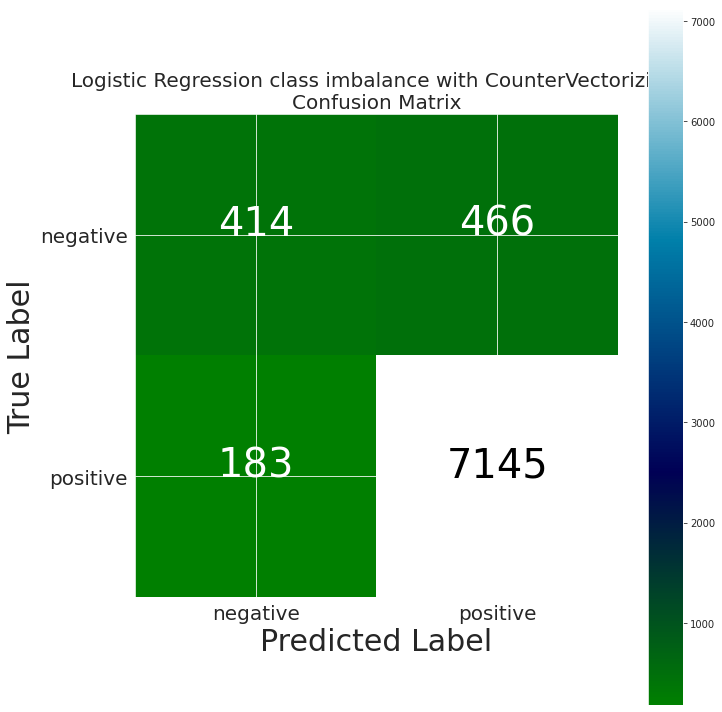

In [92]:
# Print confusion matrix for logistic regression with countvectorizer
disp_confusion_matrix(y_pred_cv_logreg_imbal, "Logistic Regression class imbalance")

## 4.1.1 logistic regression with class balance

In [93]:
# Call the modeling function for logistic regression with countvectorizer and print f1 score
modeling(LogisticRegression(solver = 'newton-cg',
                            class_weight = 'balanced', random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_logreg = y_pred

f1 score: 0.8932127097391322


In [94]:
pickle.dump(model, open('model_log_tisregression_balance_cv.pkl', 'wb'))

### Classification Report

In [95]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_logreg))

              precision    recall  f1-score   support

           0       0.47      0.76      0.58       880
           1       0.97      0.90      0.93      7328

    accuracy                           0.88      8208
   macro avg       0.72      0.83      0.75      8208
weighted avg       0.91      0.88      0.89      8208



#### Confusion Matrix

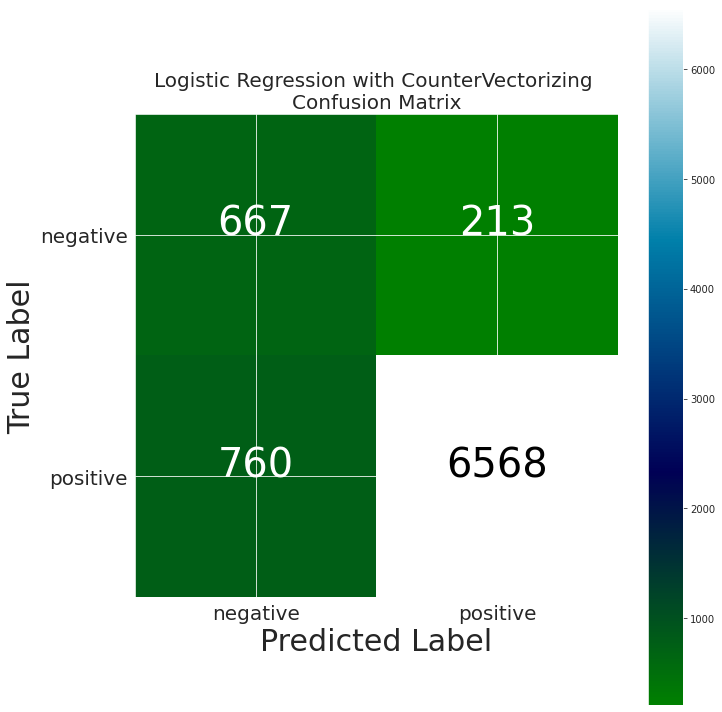

In [96]:
# Print confusion matrix for logistic regression with countvectorizer
disp_confusion_matrix(y_pred_cv_logreg, "Logistic Regression")

## 4.1.2 Random Forest with CountVectorizer

In [97]:
# Call the modeling function for random forest classifier with countvectorizer and print f1 score
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42,class_weight="balanced"))

# Assign y_pred to a variable for further process
y_pred_cv_rf = y_pred

f1 score: 0.8862668826792629


In [98]:
pickle.dump(model, open('model_randomforest_balance_cv.pkl', 'wb'))

## Classification Report

In [99]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_rf))

              precision    recall  f1-score   support

           0       0.87      0.21      0.33       880
           1       0.91      1.00      0.95      7328

    accuracy                           0.91      8208
   macro avg       0.89      0.60      0.64      8208
weighted avg       0.91      0.91      0.89      8208



#### Confusion Matrix


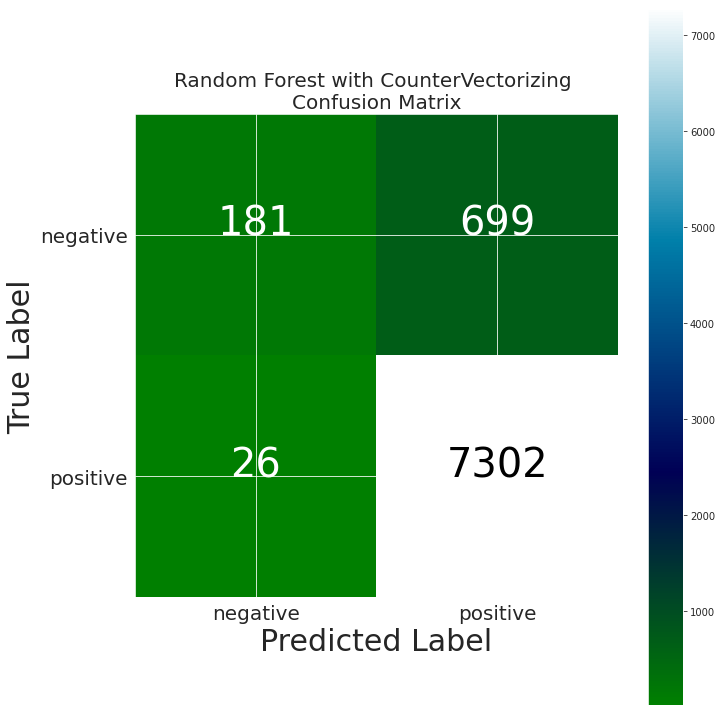

In [100]:
# Print confusion matrix for random forest classifier with countVectorizer
disp_confusion_matrix(y_pred_cv_rf, "Random Forest")

## 4.1.3 Naive Bayes with CountVectorizer

In [101]:
# Call the modeling function for naive bayes with countvectorizer and print f1 score
modeling(MultinomialNB())

# Assign y_pred to a variable for further process
y_pred_cv_nb = y_pred

f1 score: 0.8752107687491432


In [102]:
pickle.dump(model, open('model_nb_cv.pkl', 'wb'))

### Classification Report

In [103]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_nb))

              precision    recall  f1-score   support

           0       0.52      0.22      0.31       880
           1       0.91      0.97      0.94      7328

    accuracy                           0.89      8208
   macro avg       0.71      0.60      0.63      8208
weighted avg       0.87      0.89      0.88      8208



#### Confusion Matrix

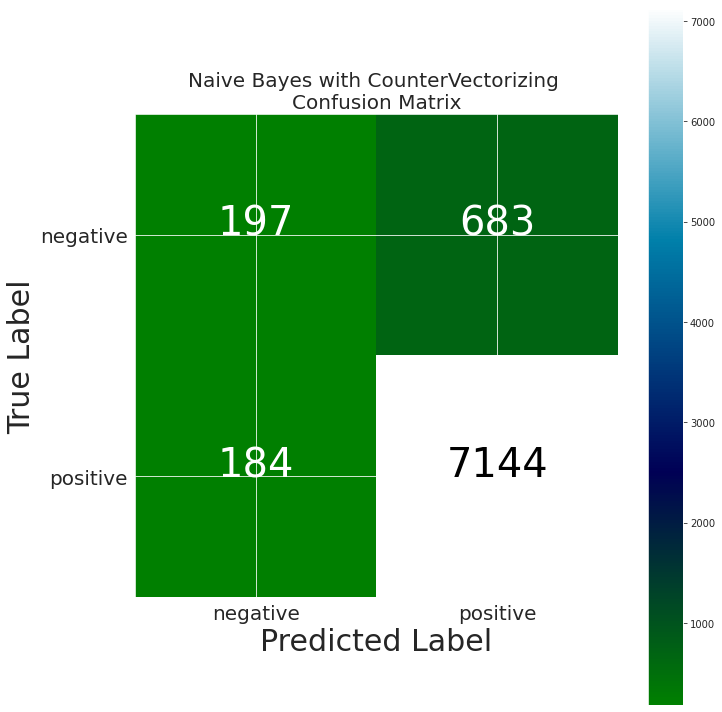

In [104]:
# Print confusion matrix for naive bayes with countVectorizer
disp_confusion_matrix(y_pred_cv_nb, "Naive Bayes")

## 4.1.4 XGBoost

In [105]:
df2['user_sentiment'].value_counts()

1    24422
0     2936
Name: user_sentiment, dtype: int64

In [106]:

2936/(24422+2936)

0.10731778638789385

In [107]:
24422/(24422+2936)

0.8926822136121062

In [108]:
# Call the modeling function for XGBoost with countvectorizer and print f1 score
modeling(XGBClassifier(scale_pos_weight=0.89))

# Assign y_pred to a variable for further process
y_pred_cv_xgb = y_pred

f1 score: 0.858342654602675


In [109]:
pickle.dump(model, open('model_xgboost_cv.pkl', 'wb'))

## Classification report

In [110]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_xgb))

              precision    recall  f1-score   support

           0       0.85      0.07      0.13       880
           1       0.90      1.00      0.95      7328

    accuracy                           0.90      8208
   macro avg       0.87      0.53      0.54      8208
weighted avg       0.89      0.90      0.86      8208



### Confusion matrix

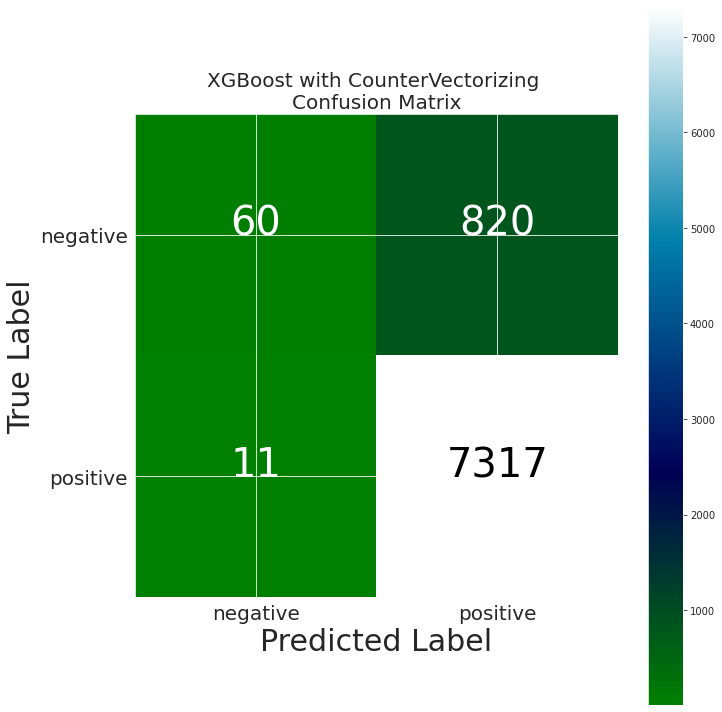

In [111]:
# Print confusion matrix for gradient boosting with countVectorizer
disp_confusion_matrix(y_pred_cv_xgb, "XGBoost")

### 4.1.6 Comparison of Models with CountVectorizer

In [112]:
# Function for converting the "classification report" results to a dataframe
def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total

    class_report_df['weighted avg'] = avg

    return class_report_df.T

# Function for adding explanatory columns and organizing all dataframe
def comparison_matrix(y_test, y_pred, label, vector):
    df = pandas_classification_report(y_test, y_pred)
    df['class']=['negative', 'positive', 'average']
    df['accuracy']= metrics.accuracy_score(y_test, y_pred)
    df['model'] = label
    df['vectorizer'] = vector
    df = df[['vectorizer', 'model', 'accuracy', 'class', 'precision', 'recall', 'f1-score', 'support']]
    return df

In [113]:
#For loop for using "comparison functions" 

def comparison_table(y_preds, labels):
    
    # empty list for collecting dataframes
    frames_tv = [] 
    
    # list for y_preds
    y_preds_tv = y_preds
    
    # list for labels
    labels_tv = labels  
    
    vector_tv = 'CountVect'
    
    for y_pred, label in zip(y_preds_tv, labels_tv):
        df = comparison_matrix(y_test, y_pred, label, vector_tv)
        frames_tv.append(df)

    # concatenating all dataframes
    global df_tv
    df_tv = pd.concat(frames_tv)
    
    global df_tv2
    df_tv2 = df_tv.set_index(['vectorizer', 'model', 'accuracy', 'class'])

### Function for f1 Score Plotting

In [114]:
def f1_score_bar_plot(df, category, title):
    df = df[df['class']==category]
    x = list(df['model'])
    y = list(df['f1-score'])
    y_round = list(round(df['f1-score'],2))
    a = (list(df['f1-score'])).index(max(list(df['f1-score'])))
    z = (list(df['f1-score'])).index(min(list(df['f1-score'])))
    y_mean = round(df['f1-score'].mean(),2)
    
    plt.rcParams['figure.figsize']=[15,5]
    b_plot = plt.bar(x=x,height=y)
    b_plot[a].set_color('g')
    b_plot[z].set_color('r')
    
    for i,v in enumerate(y_round):
        plt.text(i-.15,0.018,str(v), color='black', fontsize=15, fontweight='bold')
    
    plt.axhline(y_mean,ls='--',color='k',label=y_mean)
    plt.title(title)
    plt.legend()
    
    return plt.show()

### Algorithms Comparison with CountVectorizer

In [115]:
comparison_table(y_preds = [y_pred_cv_logreg, y_pred_cv_rf, y_pred_cv_nb, y_pred_cv_xgb], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost'])

In [116]:
df_tv2

precision  ...  support
vectorizer model         accuracy class                ...         
CountVect  LogReg        0.881457 negative   0.467414  ...    880.0
                                  positive   0.968589  ...   7328.0
                                  average    0.914857  ...   8208.0
           Random Forest 0.911672 negative   0.874396  ...    880.0
                                  positive   0.912636  ...   7328.0
                                  average    0.908536  ...   8208.0
           Naive Bayes   0.894371 negative   0.517060  ...    880.0
                                  positive   0.912738  ...   7328.0
                                  average    0.870316  ...   8208.0
           XGBoost       0.898757 negative   0.845070  ...    880.0
                                  positive   0.899226  ...   7328.0
                                  average    0.893420  ...   8208.0

[12 rows x 4 columns]

#### Average f1 Score - Models with CountVectorizer

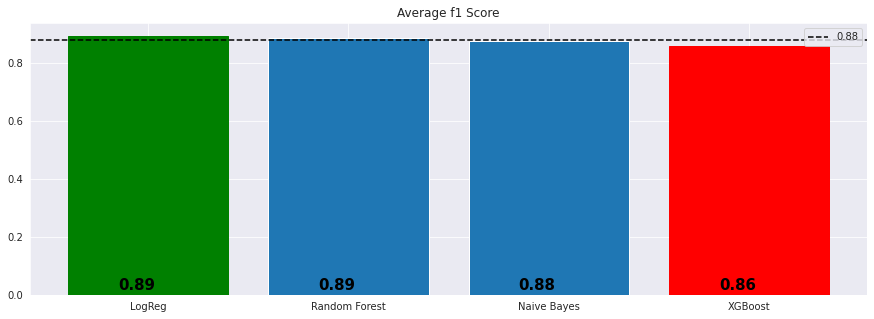

In [117]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average f1 Score")

# 4.2 TF-IDF

#### In order to help our model focus more on meaningful words, we can use a TF-IDF score (Term Frequency, Inverse Document Frequency) on top of our Bag of Words model. TF-IDF weighs words by how rare they are 
#### in our dataset, discounting words that are too frequent and just add to the noise.

In [118]:
# Create the word vector with TF-IDF Vectorizer
tfidf_vect = TfidfVectorizer(ngram_range=(1, 1))
tfidf_vect_train = tfidf_vect.fit_transform(X_train)
tfidf_vect_train = tfidf_vect_train.toarray()
tfidf_vect_test = tfidf_vect.transform(X_test)
tfidf_vect_test = tfidf_vect_test.toarray()

## 4.2.1 Logistic Regression with TF-IDF

In [119]:
# Call the modeling function for logistic regression with TF-IDF and print f1 score
modeling(LogisticRegression( solver = 'newton-cg', 
                             random_state = 42), 
                            tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_logreg_imbal = y_pred

f1 score: 0.8804940515494573


In [120]:
import pickle
 
pickle.dump(model, open('model_log_tisregression_imbalance_tfidf.pkl', 'wb'))

### Classification Report

In [121]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_logreg_imbal))

              precision    recall  f1-score   support

           0       0.83      0.18      0.30       880
           1       0.91      1.00      0.95      7328

    accuracy                           0.91      8208
   macro avg       0.87      0.59      0.62      8208
weighted avg       0.90      0.91      0.88      8208



#### Confusion Matrix

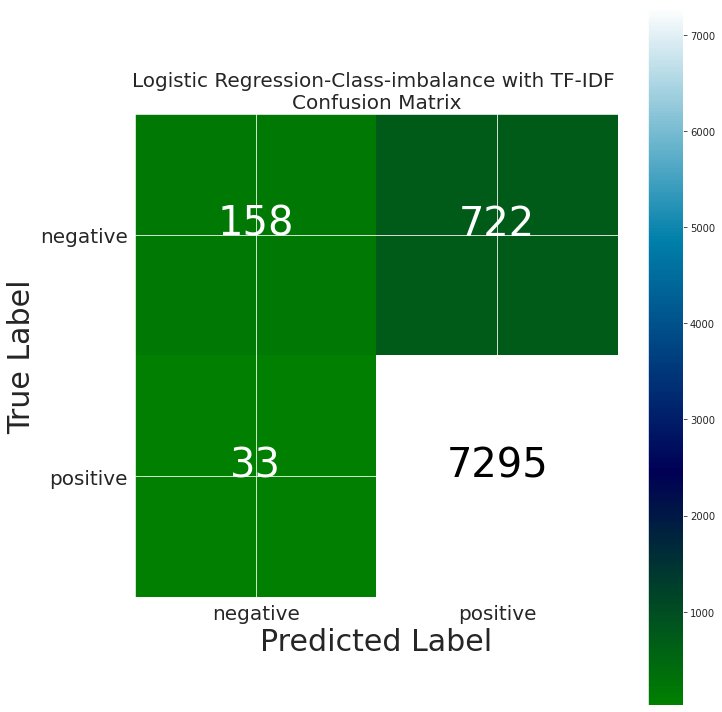

In [122]:
# Print confusion matrix for logistic regression with TF-IDF
disp_confusion_matrix(y_pred_tfidf_logreg_imbal, "Logistic Regression-Class-imbalance", "TF-IDF")

## 4.2.1 Logistic Regression with TF-IDF

In [123]:
# Call the modeling function for logistic regression with TF-IDF and print f1 score
modeling(LogisticRegression( class_weight = 'balanced',  random_state = 42), 
                            tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_logreg = y_pred

f1 score: 0.8713227432215174


## Classification Report

In [124]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_logreg))

              precision    recall  f1-score   support

           0       0.40      0.79      0.53       880
           1       0.97      0.86      0.91      7328

    accuracy                           0.85      8208
   macro avg       0.69      0.83      0.72      8208
weighted avg       0.91      0.85      0.87      8208



### Confusion Matrix

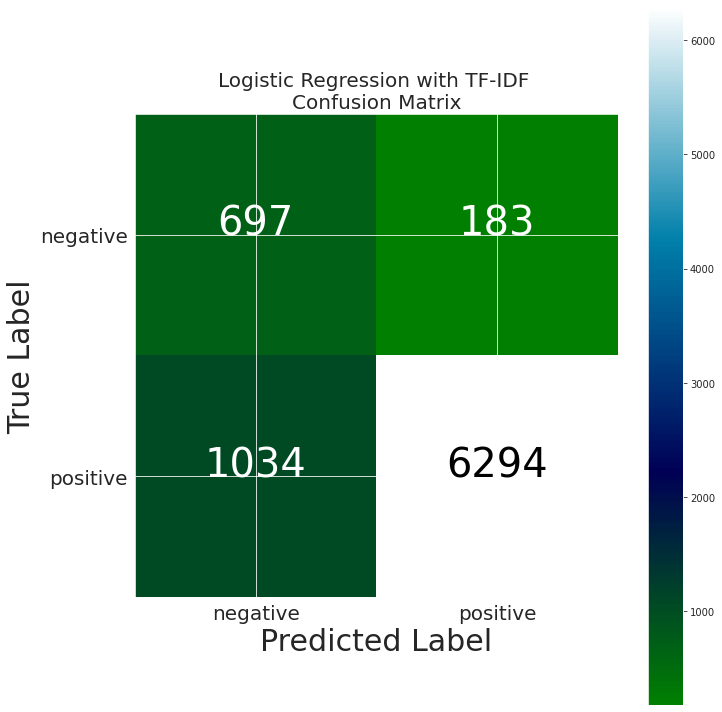

In [125]:
# Print confusion matrix for logistic regression with TF-IDF
disp_confusion_matrix(y_pred_tfidf_logreg, "Logistic Regression", "TF-IDF")

In [126]:
pickle.dump(model, open('model_log_tisregression_balance_tfidf.pkl', 'wb'))

### 4.2.2 Random Forest with TF-IDF

In [127]:
# Call the modeling function for random forest classifier with TF-IDF and print f1 score
modeling(RandomForestClassifier(n_estimators = 200,class_weight="balanced", random_state = 42), 
         tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_rf = y_pred

f1 score: 0.8878356153319626


In [128]:
import pickle
 
pickle.dump(model, open('model_randomforest_balance_tfidf.pkl', 'wb'))

### Classification Report

In [129]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_rf))

              precision    recall  f1-score   support

           0       0.90      0.21      0.34       880
           1       0.91      1.00      0.95      7328

    accuracy                           0.91      8208
   macro avg       0.91      0.60      0.65      8208
weighted avg       0.91      0.91      0.89      8208



#### Confusion Matrix

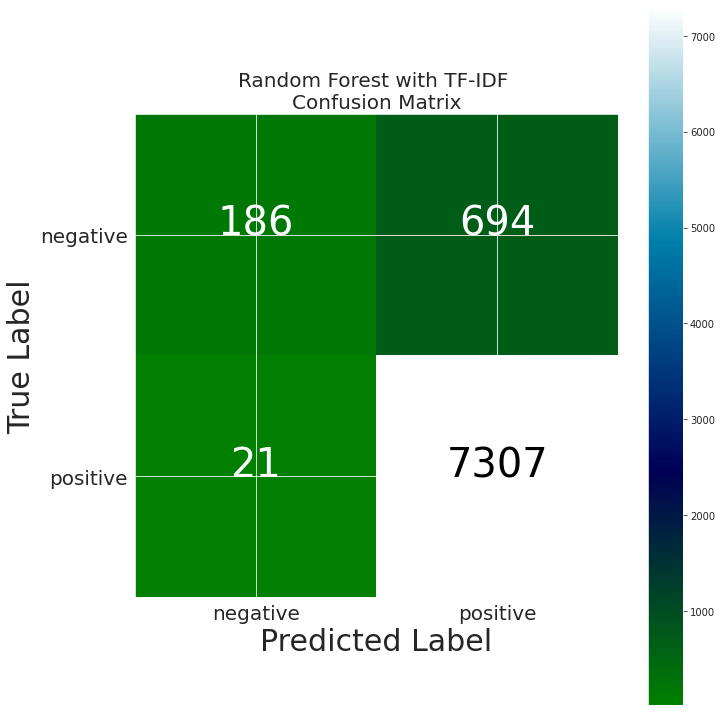

In [130]:
# Print confusion matrix for random forest classifier with TF-IDF
disp_confusion_matrix(y_pred_tfidf_rf, "Random Forest", "TF-IDF")

### 4.2.3 Naive Bayes with TF-IDF

In [131]:
# Call the modeling function for naive bayes with TF-IDF and print f1 score
modeling(MultinomialNB(), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_nb = y_pred

f1 score: 0.842217685190204


In [132]:
pickle.dump(model, open('model_naive-baise_tfidf.pkl', 'wb'))

#### Classification Report

In [133]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_nb))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       880
           1       0.89      1.00      0.94      7328

    accuracy                           0.89      8208
   macro avg       0.45      0.50      0.47      8208
weighted avg       0.80      0.89      0.84      8208



### Confusion Matrix

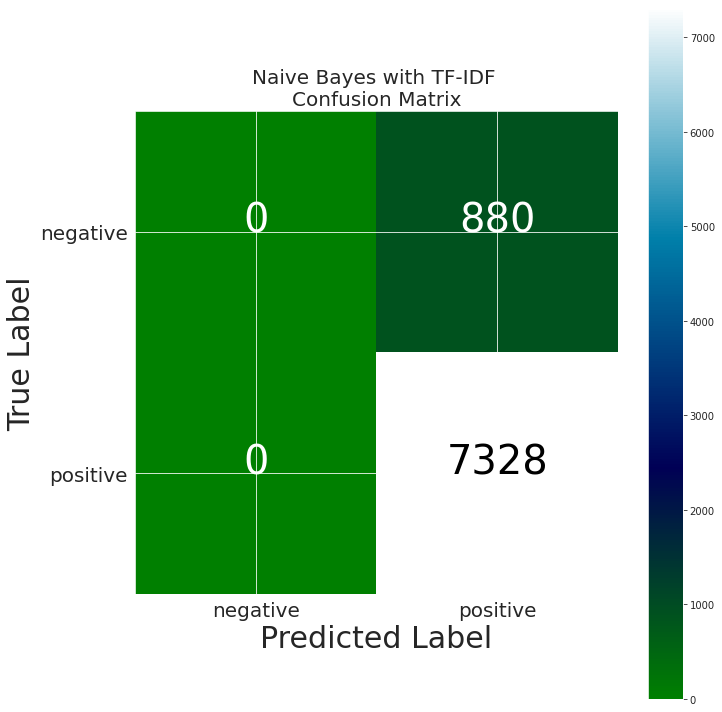

In [134]:
# Print confusion matrix for naive bayes with TF-IDF
disp_confusion_matrix(y_pred_tfidf_nb, "Naive Bayes", "TF-IDF")

## 4.2.4 XGBoost with TF-IDF

In [135]:
# Call the modeling function for XGBoost with TF-IDF and print f1 score
modeling(XGBClassifier(scale_pos_weight=0.89), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_xgb = y_pred

f1 score: 0.8593268043476051


In [136]:
pickle.dump(model, open('model_xgboost_tfidf.pkl', 'wb'))

### Classification Report

In [137]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_xgb))

              precision    recall  f1-score   support

           0       0.84      0.07      0.13       880
           1       0.90      1.00      0.95      7328

    accuracy                           0.90      8208
   macro avg       0.87      0.54      0.54      8208
weighted avg       0.89      0.90      0.86      8208



## Confusion Matrix

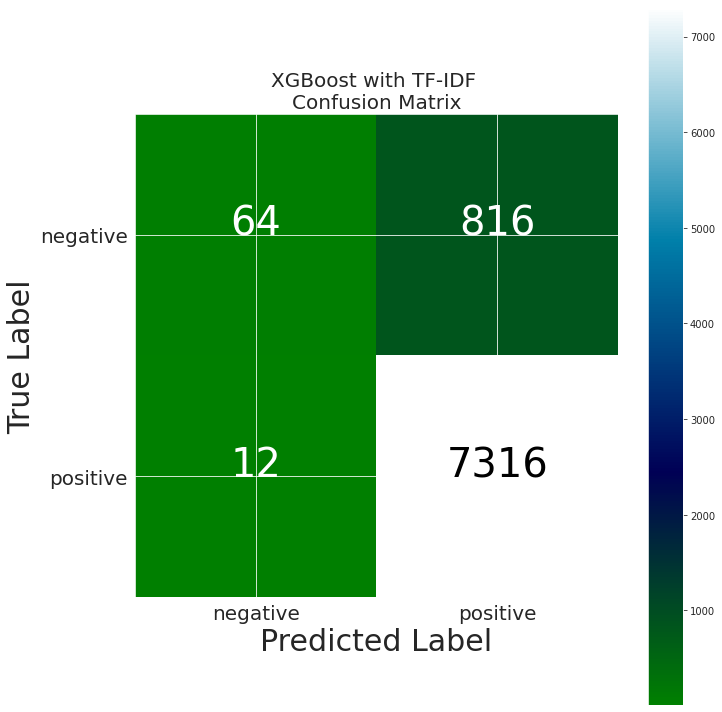

In [138]:
# Print confusion matrix for XGBoost with TF-IDF
disp_confusion_matrix(y_pred_tfidf_xgb, "XGBoost", "TF-IDF")

### 4.2.6 Comparision of Models with TF-IDF Vectorizer

In [139]:
comparison_table(y_preds = [y_pred_tfidf_logreg, y_pred_tfidf_rf, y_pred_tfidf_nb, y_pred_tfidf_xgb], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost'])

## Comparison Table - TF-IDF Vectorizing

In [140]:
# Print the comparision matrix
print('\nComparision Matrix of Models with TF-IDF Vectorizer\n')
df_tv2


Comparision Matrix of Models with TF-IDF Vectorizer



precision  ...  support
vectorizer model         accuracy class                ...         
CountVect  LogReg        0.851730 negative   0.402657  ...    880.0
                                  positive   0.971746  ...   7328.0
                                  average    0.910733  ...   8208.0
           Random Forest 0.912890 negative   0.898551  ...    880.0
                                  positive   0.913261  ...   7328.0
                                  average    0.911684  ...   8208.0
           Naive Bayes   0.892788 negative   0.000000  ...    880.0
                                  positive   0.892788  ...   7328.0
                                  average    0.797070  ...   8208.0
           XGBoost       0.899123 negative   0.842105  ...    880.0
                                  positive   0.899656  ...   7328.0
                                  average    0.893486  ...   8208.0

[12 rows x 4 columns]

## Average f1 score - Models with TF-IDF Vectorizer

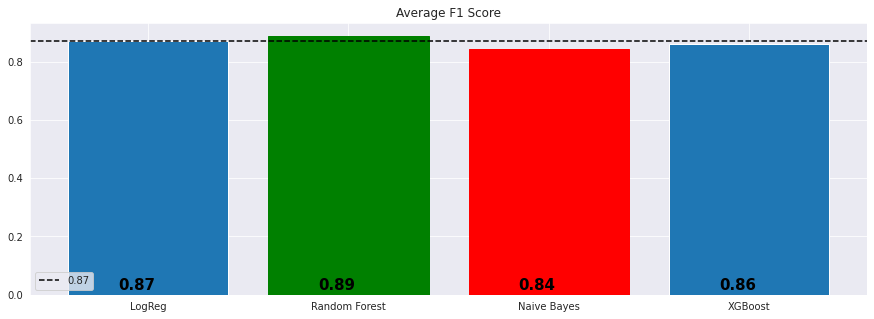

In [141]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average F1 Score")

Since the Random forest model has an average f1 score of 0.89 and reasonable amount of accuracy so considering random forest model

In [142]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils
import gensim
import nltk
from gensim.models.word2vec import Word2Vec
import tensorflow as tf
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
nltk.download('stopwords')
import re
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Tokenizer

In [143]:
from keras.preprocessing.text import Tokenizer

samples = X
tokenizer = Tokenizer(lower=True, split=' ') # creates tokenizer
tokenizer.fit_on_texts(samples)  # builds the word index
sequences = tokenizer.texts_to_sequences(samples) #turns strings into list of integers
# word_index is a dictionary mapping words to an integer index
word_index = tokenizer.word_index 
print(f'Found {len(word_index)} unique tokens. ')

Found 15806 unique tokens. 


In [144]:
max([max(sequence) for sequence in sequences])

15806

In [145]:
# Each number is the index of the word in the order of word in original text
sequences[0]

[168,
 495,
 6,
 33,
 28,
 21,
 392,
 7792,
 3017,
 168,
 135,
 73,
 186,
 6,
 495,
 4763,
 3226,
 1500,
 129,
 319,
 795,
 2206,
 3018,
 2580,
 319,
 230,
 443,
 992,
 4149,
 7793,
 878,
 785,
 8,
 14,
 618,
 123,
 124,
 879,
 3018,
 2580,
 196,
 84,
 168,
 578,
 48,
 4764,
 433,
 3,
 129,
 3,
 917,
 950,
 4150,
 279,
 285,
 279,
 92]

In [146]:
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in sequences[0]])

In [147]:
def sequence_to_text(sequence):
    words =  [reverse_word_index.get(letter) for letter in sequence]
    return words

my_text = list(map(sequence_to_text, sequences))

In [148]:
print(sequences[0])

[168, 495, 6, 33, 28, 21, 392, 7792, 3017, 168, 135, 73, 186, 6, 495, 4763, 3226, 1500, 129, 319, 795, 2206, 3018, 2580, 319, 230, 443, 992, 4149, 7793, 878, 785, 8, 14, 618, 123, 124, 879, 3018, 2580, 196, 84, 168, 578, 48, 4764, 433, 3, 129, 3, 917, 950, 4150, 279, 285, 279, 92]


# Word2Vec

In [149]:

word2vec = gensim.models.Word2Vec(my_text,
                                  size=100,
                                  window=10,
                                  min_count=1)
word2vec.train(my_text, total_examples=25026, epochs=10)

(3994204, 5145680)

In [150]:
similar_words = {search_term: [item[0] for item in word2vec.wv.most_similar([search_term], topn=5)]
                  for search_term in ['feel', 'good', 'product', 'cheap', 'junk', 'bad', 'great','price','love']}
similar_words

{'bad': ['bother', 'either', 'horrible', 'although', 'searly'],
 'cheap': ['cents', 'cheaper', 'assume', 'onlinevat', 'expensive'],
 'feel': ['smell', 'softer', 'shiny', 'smooth', 'cakey'],
 'good': ['great', 'average', 'decent', 'okay', 'fantastic'],
 'great': ['good', 'fantastic', 'awesome', 'excellent', 'amaze'],
 'junk': ['noise', 'funiture', 'platinums', 'fatigue', 'beater'],
 'love': ['awesome', 'amaze', 'great', 'absolutely', 'favorite'],
 'price': ['deal', 'value', 'friday', 'buck', 'cost'],
 'product': ['products', 'hairs', 'result', 'use', 'moisturizer']}

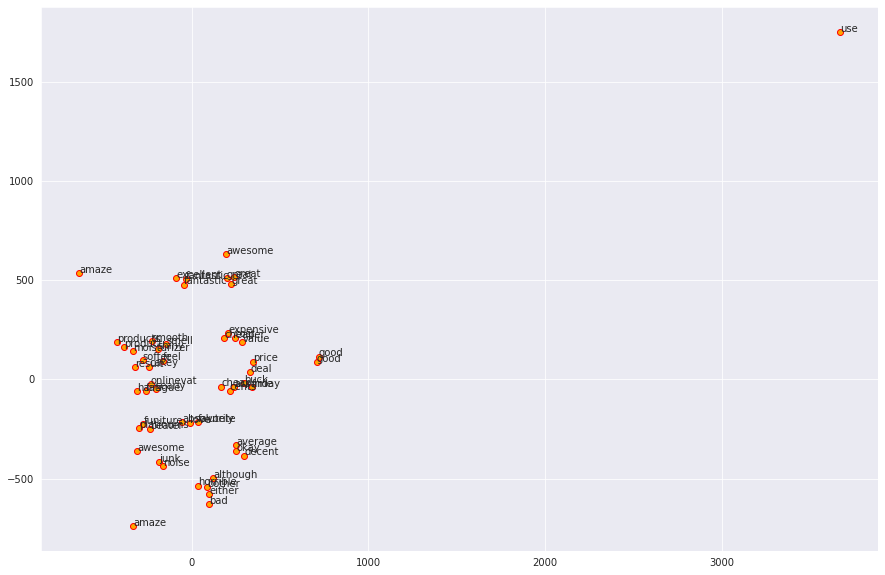

In [151]:
words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = word2vec.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(15, 10))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, yt in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, yt+1), xytext=(0, 0), textcoords='offset points')

In [152]:
len(word_index.keys())

15806

*So we created word vectors using Word2Vec and the model has 15806 unique words where each word has a vector length of 100

*Now we are going to use these dense vectors - word embeddings - in a simple neural network to predict

In [153]:
from keras.preprocessing.sequence import pad_sequences
max_length = 200 # fix the length of each review 
max_words = len(word_index.keys()) # fix number of words 

training_samples = 6000
validation_samples = 2933
data = pad_sequences(sequences, maxlen=max_length)

#labels = np.asarray(y)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', y.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = y.reindex(index=indices)

x_train = data[:training_samples]
y_train = y[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = y[training_samples: training_samples + validation_samples]
print('Shape of training data: ', x_train.shape)
print('Shape of validation data: ', x_val.shape)

Shape of data tensor: (27358, 200)
Shape of label tensor: (27358,)
Shape of training data:  (6000, 200)
Shape of validation data:  (2933, 200)


In [154]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words+1, embedding_dim))
for word , i in word_index.items():
    embedding_vector = word2vec.wv[word]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [155]:
embedding_matrix.shape

(15807, 100)

In [156]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense


model = Sequential()
model.add(Embedding(max_words+1, embedding_dim, input_length=max_length))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 100)          1580700   
_________________________________________________________________
flatten (Flatten)            (None, 20000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                640032    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 2,220,765
Trainable params: 2,220,765
Non-trainable params: 0
_________________________________________________________________


In [157]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [158]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
188/188 [==============================] - 4s 7ms/step - loss: 0.4582 - acc: 0.8479 - val_loss: 0.3547 - val_acc: 0.9042
Epoch 2/10
188/188 [==============================] - 1s 5ms/step - loss: 0.3227 - acc: 0.8821 - val_loss: 0.3780 - val_acc: 0.9021
Epoch 3/10
188/188 [==============================] - 1s 5ms/step - loss: 0.2872 - acc: 0.8820 - val_loss: 0.4031 - val_acc: 0.8991
Epoch 4/10
188/188 [==============================] - 1s 5ms/step - loss: 0.2221 - acc: 0.9055 - val_loss: 0.4469 - val_acc: 0.8933
Epoch 5/10
188/188 [==============================] - 1s 5ms/step - loss: 0.1934 - acc: 0.9144 - val_loss: 0.5061 - val_acc: 0.8899
Epoch 6/10
188/188 [==============================] - 1s 5ms/step - loss: 0.1687 - acc: 0.9264 - val_loss: 0.5699 - val_acc: 0.8882
Epoch 7/10
188/188 [==============================] - 1s 5ms/step - loss: 0.1308 - acc: 0.9402 - val_loss: 0.6119 - val_acc: 0.8674
Epoch 8/10
188/188 [==============================] - 1s 5ms/step - loss: 0.

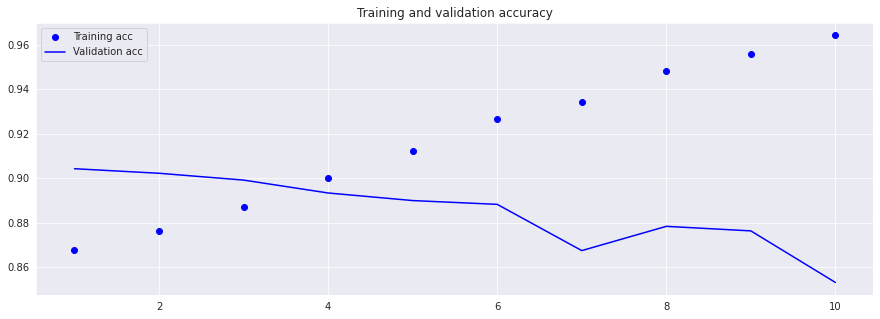

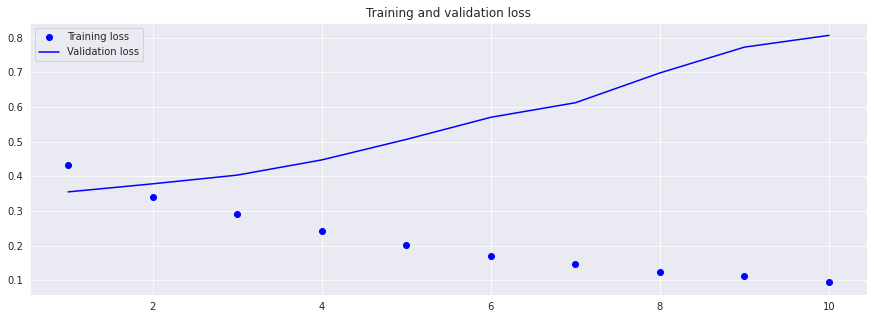

In [159]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Recomendation Engine

In [160]:
ratings=df.copy()

In [161]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27358 entries, 3 to 29999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   27358 non-null  object
 1   brand                27358 non-null  object
 2   categories           27358 non-null  object
 3   manufacturer         27358 non-null  object
 4   name                 27358 non-null  object
 5   reviews_date         27358 non-null  object
 6   reviews_doRecommend  27358 non-null  object
 7   reviews_rating       27358 non-null  int64 
 8   reviews_username     27358 non-null  object
 9   user_sentiment       27358 non-null  int64 
 10  Feedback             27358 non-null  object
 11  clean_feedback       27358 non-null  object
 12  token                27358 non-null  object
 13  review_length        27358 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 4.4+ MB


In [162]:
ratings.drop(labels=['brand','categories','manufacturer','reviews_date','reviews_doRecommend','user_sentiment','Feedback','token',
                     'clean_feedback','review_length'],axis=1,inplace=True)

In [163]:
ratings.shape

(27358, 4)

In [164]:
df4=ratings.copy()

In [165]:
df4.isnull().any().any()

False

In [166]:
len(df4['reviews_username'].unique())

23122

In [167]:
counts1=df['reviews_username'].value_counts() 
counts=df['id'].value_counts()

In [168]:
counts1

mike       39
chris      30
sandy      15
john       14
rick       14
           ..
mekus31     1
2689        1
maria58     1
kosana      1
flobee      1
Name: reviews_username, Length: 23122, dtype: int64

In [169]:
counts

AVpf3VOfilAPnD_xjpun    8495
AVpfPaoqLJeJML435Xk9    3324
AVpfJP1C1cnluZ0-e3Xy    2008
AVpfRTh1ilAPnD_xYic2    1139
AVpfW8y_LJeJML437ySW    1034
                        ... 
AVpf8AoBilAPnD_xkzJ2       1
AVpfUCiPilAPnD_xZai4       1
AVpfddjcLJeJML439loo       1
AVpfCjEEilAPnD_xTn75       1
AVpfHZMxLJeJML432tfs       1
Name: id, Length: 206, dtype: int64

In [170]:
len(counts1[counts1>=2].index)

3076

In [171]:
len(counts[counts>=5].index)

130

In [172]:
ratings.drop_duplicates(inplace=True)

In [173]:
ratings.duplicated().sum()

0

In [174]:
ratings_sum = pd.DataFrame(df4.groupby(['id'])['reviews_rating'].sum()).rename(columns = {'reviews_rating': 'ratings_sum'})
top10 = ratings_sum.sort_values('ratings_sum', ascending = False).head(10)
top10

ratings_sum
id                               
AVpf3VOfilAPnD_xjpun        40970
AVpfPaoqLJeJML435Xk9        14462
AVpfJP1C1cnluZ0-e3Xy         9732
AVpfRTh1ilAPnD_xYic2         5328
AVpfW8y_LJeJML437ySW         4269
AVpf0eb2LJeJML43EVSt         3945
AVpf63aJLJeJML43F__Q         3689
AVpe41TqilAPnD_xQH3d         3258
AVpf2tw1ilAPnD_xjflC         3111
AVpe59io1cnluZ0-ZgDU         3000

In [175]:
top10_popular=top10.merge(df4,left_index = True, right_on = 'id').drop_duplicates(
    ['id', 'name'])[['id', 'name','ratings_sum']]

In [176]:
print ('Top 10 Popular Products by sum user ratings\n')
top10_popular

Top 10 Popular Products by sum user ratings



id  ... ratings_sum
6479   AVpf3VOfilAPnD_xjpun  ...       40970
22884  AVpfPaoqLJeJML435Xk9  ...       14462
18570  AVpfJP1C1cnluZ0-e3Xy  ...        9732
27222  AVpfRTh1ilAPnD_xYic2  ...        5328
28814  AVpfW8y_LJeJML437ySW  ...        4269
4531   AVpf0eb2LJeJML43EVSt  ...        3945
15739  AVpf63aJLJeJML43F__Q  ...        3689
1796   AVpe41TqilAPnD_xQH3d  ...        3258
5591   AVpf2tw1ilAPnD_xjflC  ...        3111
2583   AVpe59io1cnluZ0-ZgDU  ...        3000

[10 rows x 3 columns]

In [177]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(ratings, test_size = 0.30, random_state = 42)

In [178]:
print(train.shape)
print(test.shape)

(18018, 4)
(7722, 4)


In [179]:
df_product_features = train.pivot_table(index = 'reviews_username', columns = 'name', values ='reviews_rating').fillna(0)

Copy train and test data

- This was required because for the train data I am only intrested for those ratings that are not available for the use

- For test since I want to compare the acutal and the predicted we are only intrested for those rating that are available

In [180]:
dummy_train = train.copy()
dummy_test = test.copy()

In [181]:
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x:0 if x>=1 else 1)
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x:1 if x>=1 else 0)

In [182]:
dummy_train = dummy_train.pivot_table(
    index = 'reviews_username',
    columns = 'name',
    values = 'reviews_rating'
).fillna(1)

In [183]:
dummy_train.head()

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  ...  Yes To Grapefruit Rejuvenating Body Wash
reviews_username                                                                 ...                                          
00sab00                                                         1.0              ...                                       1.0
01impala                                                        1.0              ...                                       1.0
02dakota                                                        1.0              ...                                       1.0
02deuce                                                         1.0              ...                                       1.0
0325home                                                        1.0              ...                                       1.0

[5 rows x 185 columns]

In [184]:
dummy_test = dummy_test.pivot_table(
    index = 'reviews_username',
    columns = 'name',
    values = 'reviews_rating'
).fillna(0)

In [185]:
dummy_test.head()

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  ...  Yes To Grapefruit Rejuvenating Body Wash
reviews_username                                                                 ...                                          
00dog3                                                          0.0              ...                                       0.0
06stidriver                                                     0.0              ...                                       0.0
1.11E+24                                                        0.0              ...                                       0.0
1085                                                            0.0              ...                                       0.0
10ten                                                           0.0              ...                                       0.0

[5 rows x 175 columns]

Model building

In [186]:
pd.set_option('display.max_columns', 1000)

In [187]:
train.head()

id  \
1089   AV1YmDL9vKc47QAVgr7_   
940    AV1YGDqsGV-KLJ3adc-O   
23715  AVpfPaoqLJeJML435Xk9   
12664  AVpf3VOfilAPnD_xjpun   
8450   AVpf3VOfilAPnD_xjpun   

                                                    name  reviews_rating  \
1089              Aussie Aussome Volume Shampoo, 13.5 Oz               4   
940    Windex Original Glass Cleaner Refill 67.6oz (2...               5   
23715  Godzilla 3d Includes Digital Copy Ultraviolet ...               4   
12664  Clorox Disinfecting Wipes Value Pack Scented 1...               5   
8450   Clorox Disinfecting Wipes Value Pack Scented 1...               5   

       reviews_username  
1089             keegan  
940            murphy24  
23715         harmony22  
12664             marah  
8450   nicknameisstupid

In [188]:
sam = train.groupby('reviews_username', as_index=False)['reviews_rating'].count().sort_values(['reviews_rating'], ascending=False)
sam = sam.sort_values(['reviews_rating'], ascending=False)
sam.head()

reviews_username  reviews_rating
10382             mike              15
13472            sandy              11
7285              john              10
6478             james               9
2864             chris               9

In [189]:
sam[sam['reviews_username']=='mike']

reviews_username  reviews_rating
10382             mike              15

In [190]:
sam = test.groupby('reviews_username', as_index=False)['reviews_rating'].count()
sam = sam.sort_values(['reviews_rating'], ascending=False)
sam.head()

reviews_username  reviews_rating
1259            chris               7
5780             rick               7
4646             mike               6
1658            danny               5
4656            mikey               5

In [191]:
# User-Item Matirx
product_features = train.pivot_table(index = 'reviews_username', columns = 'name', values ='reviews_rating')
product_features.head()

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00sab00                                                         NaN               
01impala                                                        NaN               
02dakota                                                        NaN               
02deuce                                                         NaN               
0325home                                                        NaN               

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00sab00                                           NaN   
01impala                                          NaN   
02dakota                                          NaN   
02deuce                                           NaN   
0325home                                          NaN   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00sab00                                              NaN   
01impala                                             NaN   
02dakota                                             NaN   
02deuce                                              NaN   
0325home                                             NaN   

name              4C Grated Parmesan Cheese 100% Natural 8oz Shaker  \
reviews_username                                                      
00sab00                                                         NaN   
01impala                                                        NaN   
02dakota                                                        NaN   
02deuce                                                         NaN   
0325home                                                        NaN   

name              Africa's Best No-Lye Dual Conditioning Relaxer System Super  \
reviews_username                                                                
00sab00                                                         NaN             
01impala                                                        NaN             
02dakota                                                        NaN             
02deuce                                                         NaN             
0325home                                                        NaN             

name              Alex Cross (dvdvideo)  \
reviews_username                          
00sab00                             NaN   
01impala                            NaN   
02dakota                            NaN   
02deuce                             NaN   
0325home                            NaN   

name              All,bran Complete Wheat Flakes, 18 Oz.  \
reviews_username                                           
00sab00                                              NaN   
01impala                                             NaN   
02dakota                                             NaN   
02deuce                                              NaN   
0325home                                             NaN   

name              Ambi Complexion Cleansing Bar  \
reviews_username                                  
00sab00                                     NaN   
01impala                                    NaN   
02dakota                                    NaN   
02deuce                                     NaN   
0325home                                    NaN   

name              Annie's Homegrown Deluxe Elbows & Four Cheese Sauce  \
reviews_username                                                        
00sab00                                                         NaN     
01impala                                                        NaN     
02dakota                                                        NaN     
02deuce                                                         NaN     
0325home    

In [192]:
product_features.sum(axis=1)

reviews_username
00sab00     4.0
01impala    3.0
02dakota    5.0
02deuce     4.0
0325home    5.0
           ... 
zwithanx    5.0
zxcsdfd     5.0
zxjki       2.0
zyiah4      5.0
zzz1127     4.0
Length: 16622, dtype: float64

In [193]:
np.nanmean(product_features, axis =1).shape

(16622,)

In [194]:
np.mean(product_features, axis =1).shape

(16622,)

In [195]:
# Mean Centring to normalize the ratings
mean = np.nanmean(product_features, axis =1)
df_subtracted = (product_features.T-mean).T

In [196]:
df_subtracted[df_subtracted.index == 'mike']

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
mike                                                            NaN               

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
mike                                        -0.545455   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
mike                                                 NaN   

name              4C Grated Parmesan Cheese 100% Natural 8oz Shaker  \
reviews_username                                                      
mike                                                            NaN   

name              Africa's Best No-Lye Dual Conditioning Relaxer System Super  \
reviews_username                                                                
mike                                                            NaN             

name              Alex Cross (dvdvideo)  \
reviews_username                          
mike                                NaN   

name              All,bran Complete Wheat Flakes, 18 Oz.  \
reviews_username                                           
mike                                                 NaN   

name              Ambi Complexion Cleansing Bar  \
reviews_username                                  
mike                                        NaN   

name              Annie's Homegrown Deluxe Elbows & Four Cheese Sauce  \
reviews_username                                                        
mike                                                            NaN     

name              Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars  \
reviews_username                                                                     
mike                                                            NaN                  

name              Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular  \
reviews_username                                                            
mike                                                            NaN         

name              Aussie Aussome Volume Shampoo, 13.5 Oz  \
reviews_username                                           
mike                                                 NaN   

name              Australian Gold Exotic Blend Lotion, SPF 4  \
reviews_username                                               
mike                                                     NaN   

name              Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz  \
reviews_username                                                                                       
mike                                                            NaN                                    

name              Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack)  \
reviews_username                                                                                                       
mike                                                            NaN                                                    

name              Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter  \
reviews_username                                                                                    
mike                                                            NaN                                 

name              Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix  \
reviews_username                                                              
mike                                                            NaN           

name              Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium  \
reviews_username                                                                  

In [197]:
df_subtracted.shape

(16622, 185)

In [198]:
df_subtracted.head()

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00sab00                                                         NaN               
01impala                                                        NaN               
02dakota                                                        NaN               
02deuce                                                         NaN               
0325home                                                        NaN               

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00sab00                                           NaN   
01impala                                          NaN   
02dakota                                          NaN   
02deuce                                           NaN   
0325home                                          NaN   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00sab00                                              NaN   
01impala                                             NaN   
02dakota                                             NaN   
02deuce                                              NaN   
0325home                                             NaN   

name              4C Grated Parmesan Cheese 100% Natural 8oz Shaker  \
reviews_username                                                      
00sab00                                                         NaN   
01impala                                                        NaN   
02dakota                                                        NaN   
02deuce                                                         NaN   
0325home                                                        NaN   

name              Africa's Best No-Lye Dual Conditioning Relaxer System Super  \
reviews_username                                                                
00sab00                                                         NaN             
01impala                                                        NaN             
02dakota                                                        NaN             
02deuce                                                         NaN             
0325home                                                        NaN             

name              Alex Cross (dvdvideo)  \
reviews_username                          
00sab00                             NaN   
01impala                            NaN   
02dakota                            NaN   
02deuce                             NaN   
0325home                            NaN   

name              All,bran Complete Wheat Flakes, 18 Oz.  \
reviews_username                                           
00sab00                                              NaN   
01impala                                             NaN   
02dakota                                             NaN   
02deuce                                              NaN   
0325home                                             NaN   

name              Ambi Complexion Cleansing Bar  \
reviews_username                                  
00sab00                                     NaN   
01impala                                    NaN   
02dakota                                    NaN   
02deuce                                     NaN   
0325home                                    NaN   

name              Annie's Homegrown Deluxe Elbows & Four Cheese Sauce  \
reviews_username                                                        
00sab00                                                         NaN     
01impala                                                        NaN     
02dakota                                                        NaN     
02deuce                                                         NaN     
0325home    

In [199]:
df_subtracted.sum(axis=1)

reviews_username
00sab00     0.0
01impala    0.0
02dakota    0.0
02deuce     0.0
0325home    0.0
           ... 
zwithanx    0.0
zxcsdfd     0.0
zxjki       0.0
zyiah4      0.0
zzz1127     0.0
Length: 16622, dtype: float64

In [201]:

# Use normalized user-item matrix, we found cosine smilarity between users
from sklearn.metrics.pairwise import pairwise_distances
user_correlation = 1-pairwise_distances(df_subtracted.fillna(0), metric = 'cosine')
user_correlation[np.isnan(user_correlation)] = 0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [202]:
user_correlation[2,:500]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [203]:
# Remove those users with -ve smilarity
user_correlation[user_correlation<0] = 0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [204]:
# Making predictions for ratings for all the beers for a user
user_predicted_ratings = np.dot(user_correlation, product_features.fillna(0))
user_predicted_ratings

array([[0.        , 3.06186218, 0.        , ..., 1.63299316, 1.41421356,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [205]:
user_predicted_ratings[2, 100]

0.0

In [206]:
# Since we are only intrested in those products that are not rated by the person , so we multiply the predictons with the dummy train
user_final_rating = np.multiply(user_predicted_ratings, dummy_train)
user_final_rating.head()

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00sab00                                                         0.0               
01impala                                                        0.0               
02dakota                                                        0.0               
02deuce                                                         0.0               
0325home                                                        0.0               

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00sab00                                      3.061862   
01impala                                     0.000000   
02dakota                                     0.000000   
02deuce                                      0.000000   
0325home                                     0.000000   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00sab00                                              0.0   
01impala                                             0.0   
02dakota                                             0.0   
02deuce                                              0.0   
0325home                                             0.0   

name              4C Grated Parmesan Cheese 100% Natural 8oz Shaker  \
reviews_username                                                      
00sab00                                                         0.0   
01impala                                                        0.0   
02dakota                                                        0.0   
02deuce                                                         0.0   
0325home                                                        0.0   

name              Africa's Best No-Lye Dual Conditioning Relaxer System Super  \
reviews_username                                                                
00sab00                                                         0.0             
01impala                                                        0.0             
02dakota                                                        0.0             
02deuce                                                         0.0             
0325home                                                        0.0             

name              Alex Cross (dvdvideo)  \
reviews_username                          
00sab00                        2.886751   
01impala                       0.000000   
02dakota                       0.000000   
02deuce                        0.000000   
0325home                       0.000000   

name              All,bran Complete Wheat Flakes, 18 Oz.  \
reviews_username                                           
00sab00                                              0.0   
01impala                                             0.0   
02dakota                                             0.0   
02deuce                                              0.0   
0325home                                             0.0   

name              Ambi Complexion Cleansing Bar  \
reviews_username                                  
00sab00                                     0.0   
01impala                                    0.0   
02dakota                                    0.0   
02deuce                                     0.0   
0325home                                    0.0   

name              Annie's Homegrown Deluxe Elbows & Four Cheese Sauce  \
reviews_username                                                        
00sab00                                                         0.0     
01impala                                                        0.0     
02dakota                                                        0.0     
02deuce                                                         0.0     
0325home    

In [207]:
# We are normalize the ratings back to 1-5
from sklearn.preprocessing import MinMaxScaler

X = user_final_rating.copy()
X = X[X>0]
scaler = MinMaxScaler(feature_range = (1,5))
scaler.fit(X)
y = scaler.transform(X)

In [208]:
y[160]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

## user-user recomendation engine 
### User-User Prediction

In [209]:
user_input = input("Enter your user name")
print(user_input)

Enter your user namesandy
sandy


In [210]:
user_final_rating.head(7)

d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d


name
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                    10.639491
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)                                8.311268
Hormel Chili, No Beans                                                              6.428676
The Resident Evil Collection 5 Discs (blu-Ray)                                      2.895845
Vicks Vaporub, Regular, 3.53oz                                                      2.633589
Red (special Edition) (dvdvideo)                                                    2.089567
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                 2.072515
Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack     1.931687
Chester's Cheese Flavored Puffcorn Snacks                                           1.880245
100:Complete First Season (blu-Ray)                                                 1.837927
Jason Aldean - They Don't Know                                   

Model Evaluation

In [211]:
test_features = test.pivot_table(index = 'reviews_username', columns = 'name', values = 'reviews_rating')

In [212]:
test_features.head()

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00dog3                                                          NaN               
06stidriver                                                     NaN               
1.11E+24                                                        NaN               
1085                                                            NaN               
10ten                                                           NaN               

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00dog3                                            NaN   
06stidriver                                       NaN   
1.11E+24                                          NaN   
1085                                              NaN   
10ten                                             NaN   

name              2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
reviews_username                                                                      
00dog3                                                          NaN                   
06stidriver                                                     NaN                   
1.11E+24                                                        NaN                   
1085                                                            NaN                   
10ten                                                           NaN                   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00dog3                                               NaN   
06stidriver                                          NaN   
1.11E+24                                             NaN   
1085                                                 NaN   
10ten                                                NaN   

name              42 Dual Drop Leaf Table with 2 Madrid Chairs"  \
reviews_username                                                  
00dog3                                                      NaN   
06stidriver                                                 NaN   
1.11E+24                                                    NaN   
1085                                                        NaN   
10ten                                                       NaN   

name              4C Grated Parmesan Cheese 100% Natural 8oz Shaker  \
reviews_username                                                      
00dog3                                                          NaN   
06stidriver                                                     NaN   
1.11E+24                                                        NaN   
1085                                                            NaN   
10ten                                                           NaN   

name              Africa's Best No-Lye Dual Conditioning Relaxer System Super  \
reviews_username                                                                
00dog3                                                          NaN             
06stidriver                                                     NaN             
1.11E+24                                                        NaN             
1085                                                            NaN             
10ten                                                           NaN             

name              Alex Cross (dvdvideo)  \
reviews_username                          
00dog3                              NaN   
06stidriver                         NaN   
1.11E+24                            NaN   
1085                                NaN   
10ten                               NaN   

name              All,bran Complete Wheat Flakes, 18 Oz.  \
reviews_username                                           
00dog3                       

In [213]:
mean = np.nanmean(test_features, axis = 1)
test_df_subtracted = (test_features.T-mean).T
test_df_subtracted.head()

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00dog3                                                          NaN               
06stidriver                                                     NaN               
1.11E+24                                                        NaN               
1085                                                            NaN               
10ten                                                           NaN               

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00dog3                                            NaN   
06stidriver                                       NaN   
1.11E+24                                          NaN   
1085                                              NaN   
10ten                                             NaN   

name              2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
reviews_username                                                                      
00dog3                                                          NaN                   
06stidriver                                                     NaN                   
1.11E+24                                                        NaN                   
1085                                                            NaN                   
10ten                                                           NaN                   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00dog3                                               NaN   
06stidriver                                          NaN   
1.11E+24                                             NaN   
1085                                                 NaN   
10ten                                                NaN   

name              42 Dual Drop Leaf Table with 2 Madrid Chairs"  \
reviews_username                                                  
00dog3                                                      NaN   
06stidriver                                                 NaN   
1.11E+24                                                    NaN   
1085                                                        NaN   
10ten                                                       NaN   

name              4C Grated Parmesan Cheese 100% Natural 8oz Shaker  \
reviews_username                                                      
00dog3                                                          NaN   
06stidriver                                                     NaN   
1.11E+24                                                        NaN   
1085                                                            NaN   
10ten                                                           NaN   

name              Africa's Best No-Lye Dual Conditioning Relaxer System Super  \
reviews_username                                                                
00dog3                                                          NaN             
06stidriver                                                     NaN             
1.11E+24                                                        NaN             
1085                                                            NaN             
10ten                                                           NaN             

name              Alex Cross (dvdvideo)  \
reviews_username                          
00dog3                              NaN   
06stidriver                         NaN   
1.11E+24                            NaN   
1085                                NaN   
10ten                               NaN   

name              All,bran Complete Wheat Flakes, 18 Oz.  \
reviews_username                                           
00dog3                       

In [214]:
test_user_correlation = 1-pairwise_distances(test_df_subtracted.fillna(0), metric = 'cosine')
test_user_correlation[np.isnan(test_user_correlation)]=0
test_user_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [215]:
test_user_correlation[test_user_correlation<0] = 0

In [216]:
test_user_predicted_ratings = np.dot(test_user_correlation, test_features.fillna(0))
test_user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [217]:
test_user_final_rating = np.multiply(test_user_predicted_ratings, dummy_test)
test_user_final_rating.head()

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00dog3                                                          0.0               
06stidriver                                                     0.0               
1.11E+24                                                        0.0               
1085                                                            0.0               
10ten                                                           0.0               

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00dog3                                            0.0   
06stidriver                                       0.0   
1.11E+24                                          0.0   
1085                                              0.0   
10ten                                             0.0   

name              2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
reviews_username                                                                      
00dog3                                                          0.0                   
06stidriver                                                     0.0                   
1.11E+24                                                        0.0                   
1085                                                            0.0                   
10ten                                                           0.0                   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00dog3                                               0.0   
06stidriver                                          0.0   
1.11E+24                                             0.0   
1085                                                 0.0   
10ten                                                0.0   

name              42 Dual Drop Leaf Table with 2 Madrid Chairs"  \
reviews_username                                                  
00dog3                                                      0.0   
06stidriver                                                 0.0   
1.11E+24                                                    0.0   
1085                                                        0.0   
10ten                                                       0.0   

name              4C Grated Parmesan Cheese 100% Natural 8oz Shaker  \
reviews_username                                                      
00dog3                                                          0.0   
06stidriver                                                     0.0   
1.11E+24                                                        0.0   
1085                                                            0.0   
10ten                                                           0.0   

name              Africa's Best No-Lye Dual Conditioning Relaxer System Super  \
reviews_username                                                                
00dog3                                                          0.0             
06stidriver                                                     0.0             
1.11E+24                                                        0.0             
1085                                                            0.0             
10ten                                                           0.0             

name              Alex Cross (dvdvideo)  \
reviews_username                          
00dog3                              0.0   
06stidriver                         0.0   
1.11E+24                            0.0   
1085                                0.0   
10ten                               0.0   

name              All,bran Complete Wheat Flakes, 18 Oz.  \
reviews_username                                           
00dog3                       

In [218]:
X = test_user_final_rating.copy()
X  =X[X>0]

scaler = MinMaxScaler(feature_range=(1,5))
scaler.fit(X)
y = scaler.transform(X)

In [219]:
y

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [220]:
test_features.head()

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00dog3                                                          NaN               
06stidriver                                                     NaN               
1.11E+24                                                        NaN               
1085                                                            NaN               
10ten                                                           NaN               

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00dog3                                            NaN   
06stidriver                                       NaN   
1.11E+24                                          NaN   
1085                                              NaN   
10ten                                             NaN   

name              2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
reviews_username                                                                      
00dog3                                                          NaN                   
06stidriver                                                     NaN                   
1.11E+24                                                        NaN                   
1085                                                            NaN                   
10ten                                                           NaN                   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00dog3                                               NaN   
06stidriver                                          NaN   
1.11E+24                                             NaN   
1085                                                 NaN   
10ten                                                NaN   

name              42 Dual Drop Leaf Table with 2 Madrid Chairs"  \
reviews_username                                                  
00dog3                                                      NaN   
06stidriver                                                 NaN   
1.11E+24                                                    NaN   
1085                                                        NaN   
10ten                                                       NaN   

name              4C Grated Parmesan Cheese 100% Natural 8oz Shaker  \
reviews_username                                                      
00dog3                                                          NaN   
06stidriver                                                     NaN   
1.11E+24                                                        NaN   
1085                                                            NaN   
10ten                                                           NaN   

name              Africa's Best No-Lye Dual Conditioning Relaxer System Super  \
reviews_username                                                                
00dog3                                                          NaN             
06stidriver                                                     NaN             
1.11E+24                                                        NaN             
1085                                                            NaN             
10ten                                                           NaN             

name              Alex Cross (dvdvideo)  \
reviews_username                          
00dog3                              NaN   
06stidriver                         NaN   
1.11E+24                            NaN   
1085                                NaN   
10ten                               NaN   

name              All,bran Complete Wheat Flakes, 18 Oz.  \
reviews_username                                           
00dog3                       

In [221]:
total_non_nan = np.count_nonzero(~np.isnan(y))

In [222]:
total_non_nan

247

In [223]:
y.shape

(7379, 175)

In [224]:
l=test_features.columns

In [225]:
df_y = pd.DataFrame(y, columns =l )


In [226]:
df_y

name  0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
0                                                   NaN               
1                                                   NaN               
2                                                   NaN               
3                                                   NaN               
4                                                   NaN               
...                                                 ...               
7374                                                NaN               
7375                                                NaN               
7376                                                NaN               
7377                                                NaN               
7378                                                NaN               

name  100:Complete First Season (blu-Ray)  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   
...                                   ...   
7374                                  NaN   
7375                                  NaN   
7376                                  NaN   
7377                                  NaN   
7378                                  NaN   

name  2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
0                                                   NaN                   
1                                                   NaN                   
2                                                   NaN                   
3                                                   NaN                   
4                                                   NaN                   
...                                                 ...                   
7374                                                NaN                   
7375                                                NaN                   
7376                                                NaN                   
7377                                                NaN                   
7378                                                NaN                   

name  2x Ultra Era with Oxi Booster, 50fl oz  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   
...                                      ...   
7374                                     NaN   
7375                                     NaN   
7376                                     NaN   
7377                                     NaN   
7378                                     NaN   

name  42 Dual Drop Leaf Table with 2 Madrid Chairs"  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   
...                                             ...   
7374                                            NaN   
7375                                            NaN   
7376                                            NaN   
7377                                            NaN   
7378                                            NaN   

name  4C Grated Parmesan Cheese 100% Natural 8oz Shaker  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
7374                                                Na

In [227]:
test_features.shape

(7379, 175)

In [228]:
sum(pd.DataFrame(test_features.values - df_y.values)**2)

15225

In [229]:
rmse = ((sum((pd.DataFrame(test_features.values - df_y.values))**2))/total_non_nan)**0.5
print(rmse)

7.8510939437355045


The RMSE of user-user recommendation engine is 7.851.

### Item-Item Recomendation model

### Using Item similarity

# Item Based Similarity

Taking the transpose of the rating matrix to normalize the rating around the mean for different movie ID. In the user based similarity, we had taken mean for each user instead of each movie.


In [230]:
df_pivot = train.pivot_table(index = 'reviews_username', columns = 'name', values ='reviews_rating').T

df_pivot.head()

reviews_username                                    00sab00  01impala  \
name                                                                    
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...      NaN       NaN   
100:Complete First Season (blu-Ray)                     NaN       NaN   
2x Ultra Era with Oxi Booster, 50fl oz                  NaN       NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker       NaN       NaN   
Africa's Best No-Lye Dual Conditioning Relaxer ...      NaN       NaN   

reviews_username                                    02dakota  02deuce  \
name                                                                    
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...       NaN      NaN   
100:Complete First Season (blu-Ray)                      NaN      NaN   
2x Ultra Era with Oxi Booster, 50fl oz                   NaN      NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker        NaN      NaN   
Africa's Best No-Lye Dual Conditioning Relaxer ...       NaN      NaN   

reviews_username                                    0325home  08dallas  \
name                                                                     
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...       NaN       NaN   
100:Complete First Season (blu-Ray)                      NaN       5.0   
2x Ultra Era with Oxi Booster, 50fl oz                   NaN       NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker        NaN       NaN   
Africa's Best No-Lye Dual Conditioning Relaxer ...       NaN       NaN   

reviews_username                                    09mommy11  1143mom  \
name                                                                     
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...        NaN      NaN   
100:Complete First Season (blu-Ray)                       NaN      NaN   
2x Ultra Era with Oxi Booster, 50fl oz                    NaN      NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker         NaN      NaN   
Africa's Best No-Lye Dual Conditioning Relaxer ...        NaN      NaN   

reviews_username                                    11677j  1234  1234567  \
name                                                                        
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...     NaN   NaN      NaN   
100:Complete First Season (blu-Ray)                    NaN   NaN      NaN   
2x Ultra Era with Oxi Booster, 50fl oz                 NaN   NaN      NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker      NaN   NaN      NaN   
Africa's Best No-Lye Dual Conditioning Relaxer ...     NaN   NaN      NaN   

reviews_username                                    1234asdf  123cat123  \
name                                                                      
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...       NaN        NaN   
100:Complete First Season (blu-Ray)                      NaN        NaN   
2x Ultra Era with Oxi Booster, 50fl oz                   NaN        NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker        NaN        NaN   
Africa's Best No-Lye Dual Conditioning Relaxer ...       NaN        NaN   

reviews_username                                    123charlie  123numbers  \
name                                                                         
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...         NaN         NaN   
100:Complete First Season (blu-Ray)                        NaN         NaN   
2x Ultra Era with Oxi Booster, 50fl oz                     NaN         NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker          NaN         NaN   
Africa's Best No-Lye Dual Conditioning Relaxer ...         NaN         NaN   

reviews_username                                    123rs  123soccermom  \
name                                                                      
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...    NaN           NaN   
100:Complete First Season (blu-Ray)                   NaN           NaN   
2x Ultra Era with Oxi Boo

#### Normalising the movie rating for each movie for using the Adujsted Cosine

In [231]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

df_subtracted.head()

reviews_username                                    00sab00  01impala  \
name                                                                    
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...      NaN       NaN   
100:Complete First Season (blu-Ray)                     NaN       NaN   
2x Ultra Era with Oxi Booster, 50fl oz                  NaN       NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker       NaN       NaN   
Africa's Best No-Lye Dual Conditioning Relaxer ...      NaN       NaN   

reviews_username                                    02dakota  02deuce  \
name                                                                    
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...       NaN      NaN   
100:Complete First Season (blu-Ray)                      NaN      NaN   
2x Ultra Era with Oxi Booster, 50fl oz                   NaN      NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker        NaN      NaN   
Africa's Best No-Lye Dual Conditioning Relaxer ...       NaN      NaN   

reviews_username                                    0325home  08dallas  \
name                                                                     
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...       NaN       NaN   
100:Complete First Season (blu-Ray)                      NaN     0.325   
2x Ultra Era with Oxi Booster, 50fl oz                   NaN       NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker        NaN       NaN   
Africa's Best No-Lye Dual Conditioning Relaxer ...       NaN       NaN   

reviews_username                                    09mommy11  1143mom  \
name                                                                     
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...        NaN      NaN   
100:Complete First Season (blu-Ray)                       NaN      NaN   
2x Ultra Era with Oxi Booster, 50fl oz                    NaN      NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker         NaN      NaN   
Africa's Best No-Lye Dual Conditioning Relaxer ...        NaN      NaN   

reviews_username                                    11677j  1234  1234567  \
name                                                                        
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...     NaN   NaN      NaN   
100:Complete First Season (blu-Ray)                    NaN   NaN      NaN   
2x Ultra Era with Oxi Booster, 50fl oz                 NaN   NaN      NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker      NaN   NaN      NaN   
Africa's Best No-Lye Dual Conditioning Relaxer ...     NaN   NaN      NaN   

reviews_username                                    1234asdf  123cat123  \
name                                                                      
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...       NaN        NaN   
100:Complete First Season (blu-Ray)                      NaN        NaN   
2x Ultra Era with Oxi Booster, 50fl oz                   NaN        NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker        NaN        NaN   
Africa's Best No-Lye Dual Conditioning Relaxer ...       NaN        NaN   

reviews_username                                    123charlie  123numbers  \
name                                                                         
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...         NaN         NaN   
100:Complete First Season (blu-Ray)                        NaN         NaN   
2x Ultra Era with Oxi Booster, 50fl oz                     NaN         NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker          NaN         NaN   
Africa's Best No-Lye Dual Conditioning Relaxer ...         NaN         NaN   

reviews_username                                    123rs  123soccermom  \
name                                                                      
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...    NaN           NaN   
100:Complete First Season (blu-Ray)                   NaN           NaN   
2x Ultra Era with Oxi Boo

#### Finding the cosine similarity using pairwise distances approach

In [232]:
from sklearn.metrics.pairwise import pairwise_distances

# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

item_correlation.shape

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


(185, 185)

#### Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [233]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

#### Prediction - Item Item

In [234]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

item_predicted_ratings.shape

(16622, 185)

In [235]:
dummy_train.shape

(16622, 185)

### Filtering the rating only for the movies not rated by the user for recommendation

In [236]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00sab00                                                         0.0               
01impala                                                        0.0               
02dakota                                                        0.0               
02deuce                                                         0.0               
0325home                                                        0.0               

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00sab00                                      0.009906   
01impala                                     0.000000   
02dakota                                     0.000000   
02deuce                                      0.000000   
0325home                                     0.000000   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00sab00                                              0.0   
01impala                                             0.0   
02dakota                                             0.0   
02deuce                                              0.0   
0325home                                             0.0   

name              4C Grated Parmesan Cheese 100% Natural 8oz Shaker  \
reviews_username                                                      
00sab00                                                         0.0   
01impala                                                        0.0   
02dakota                                                        0.0   
02deuce                                                         0.0   
0325home                                                        0.0   

name              Africa's Best No-Lye Dual Conditioning Relaxer System Super  \
reviews_username                                                                
00sab00                                                         0.0             
01impala                                                        0.0             
02dakota                                                        0.0             
02deuce                                                         0.0             
0325home                                                        0.0             

name              Alex Cross (dvdvideo)  \
reviews_username                          
00sab00                        0.007871   
01impala                       0.000000   
02dakota                       0.000000   
02deuce                        0.000000   
0325home                       0.001588   

name              All,bran Complete Wheat Flakes, 18 Oz.  \
reviews_username                                           
00sab00                                         0.000000   
01impala                                        0.000000   
02dakota                                        0.000000   
02deuce                                         0.000000   
0325home                                        0.003735   

name              Ambi Complexion Cleansing Bar  \
reviews_username                                  
00sab00                                     0.0   
01impala                                    0.0   
02dakota                                    0.0   
02deuce                                     0.0   
0325home                                    0.0   

name              Annie's Homegrown Deluxe Elbows & Four Cheese Sauce  \
reviews_username                                                        
00sab00                                                         0.0     
01impala                                                        0.0     
02dakota                                                        0.0     
02deuce                                                         0.0     
0325home    

#### Finding the top 20 recommendation for the *user*

In [237]:
# Take the user ID as input
user_input = input("Enter your user name")
print(user_input)

Enter your user namesandy
sandy


In [238]:
# Recommending the Top 20 products to the user.
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d

name
Chester's Cheese Flavored Puffcorn Snacks                                          0.759946
Progresso Traditional Chicken Tuscany Soup                                         0.394753
Suave Professionals Hair Conditioner, Sleek                                        0.315253
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)                               0.274228
All,bran Complete Wheat Flakes, 18 Oz.                                             0.244212
Jolly Time Select Premium Yellow Pop Corn                                          0.205129
Just For Men Touch Of Gray Gray Hair Treatment, Black T-55                         0.202299
Equals (blu-Ray)                                                                   0.076782
Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack    0.073035
L'oreal Paris Colour Caresse Wet Shine Stain, Pink Resistance                      0.059374
Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)               

# Evaluation - Item Item

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the movie already rated by the user insead of predicting it for the movie not rated by the user.

In [239]:
test.columns

common =  test[test.name.isin(train.name)]
common.shape

(7700, 4)

In [240]:
common.head(4)

common_item_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

common_item_based_matrix.shape

(154, 7359)

In [241]:
item_correlation_df = pd.DataFrame(item_correlation)

item_correlation_df.head(1)

0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   \
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   30   31   32   33   34   35   36   37   38   39   40   41   42   43   44   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   45   46   47   48   49   50   51   52   53   54   55   56   57   58   59   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   60   61   62   63   64   65   66   67   68   69   70   71   72   73   74   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   75   76   77   78   79   80   81   82   83   84   85   86   87   88   89   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   90   91   92   93   94   95   96   97   98   99   100  101  102  103  104  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   105  106  107  108  109  110  111  112  113  114  115  116  117  118  119  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   120  121  122  123  124  125  126  127  128  129  130  131  132  133  134  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   135  136  137  138  139  140  141  142  143  144  145  146  147  148  149  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   150  151  152  153  154  155  156  157  158  159  160  161  162  163  164  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   165  166  167  168  169  170  171  172  173  174  175  176  177  178  179  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   180  181  182  183  184  
0  0.0  0.0  0.0  0.0  0.0

In [242]:
item_correlation_df['name'] = df_subtracted.index
item_correlation_df.set_index('name',inplace=True)
item_correlation_df.head()

0    1    2    3    4    \
name                                                                          
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...  1.0  0.0  0.0  0.0  0.0   
100:Complete First Season (blu-Ray)                 0.0  1.0  0.0  0.0  0.0   
2x Ultra Era with Oxi Booster, 50fl oz              0.0  0.0  1.0  0.0  0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker   0.0  0.0  0.0  0.0  0.0   
Africa's Best No-Lye Dual Conditioning Relaxer ...  0.0  0.0  0.0  0.0  1.0   

                                                    5    6    7    8    9    \
name                                                                          
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...  0.0  0.0  0.0  0.0  0.0   
100:Complete First Season (blu-Ray)                 0.0  0.0  0.0  0.0  0.0   
2x Ultra Era with Oxi Booster, 50fl oz              0.0  0.0  0.0  0.0  0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker   0.0  0.0  0.0  0.0  0.0   
Africa's Best No-Lye Dual Conditioning Relaxer ...  0.0  0.0  0.0  0.0  0.0   

                                                    10   11   12   13   14   \
name                                                                          
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...  0.0  0.0  0.0  0.0  0.0   
100:Complete First Season (blu-Ray)                 0.0  0.0  0.0  0.0  0.0   
2x Ultra Era with Oxi Booster, 50fl oz              0.0  0.0  0.0  0.0  0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker   0.0  0.0  0.0  0.0  0.0   
Africa's Best No-Lye Dual Conditioning Relaxer ...  0.0  0.0  0.0  0.0  0.0   

                                                    15   16   17   18   19   \
name                                                                          
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...  0.0  0.0  0.0  0.0  0.0   
100:Complete First Season (blu-Ray)                 0.0  0.0  0.0  0.0  0.0   
2x Ultra Era with Oxi Booster, 50fl oz              0.0  0.0  0.0  0.0  0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker   0.0  0.0  0.0  0.0  0.0   
Africa's Best No-Lye Dual Conditioning Relaxer ...  0.0  0.0  0.0  0.0  0.0   

                                                    20   21   22   23   24   \
name                                                                          
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...  0.0  0.0  0.0  0.0  0.0   
100:Complete First Season (blu-Ray)                 0.0  0.0  0.0  0.0  0.0   
2x Ultra Era with Oxi Booster, 50fl oz              0.0  0.0  0.0  0.0  0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker   0.0  0.0  0.0  0.0  0.0   
Africa's Best No-Lye Dual Conditioning Relaxer ...  0.0  0.0  0.0  0.0  0.0   

                                                    25   26   27   28   29   \
name                                                                          
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...  0.0  0.0  0.0  0.0  0.0   
100:Complete First Season (blu-Ray)                 0.0  0.0  0.0  0.0  0.0   
2x Ultra Era with Oxi Booster, 50fl oz              0.0  0.0  0.0  0.0  0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker   0.0  0.0  0.0  0.0  0.0   
Africa's Best No-Lye Dual Conditioning Relaxer ...  0.0  0.0  0.0  0.0  0.0   

                                                    30   31   32   33   34   \
name                                                                          
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...  0.0  0.0  0.0  0.0  0.0   
100:Complete First Season (blu-Ray)                 0.0  0.0  0.0  0.0  0.0   
2x Ultra Era with Oxi Booster, 50fl oz              0.0  0.0  0.0  0.0  0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker   0.0  0.0  0.0  0.0  0.0   
Africa's Best No-Lye Dual Conditioning Relaxer ...  0.0  0.0  0.0  0.0  0.0   

                                                    35   36   37   38   39   \
name                                                                          
0.6 Cu. Ft. Lett

In [243]:
list_name = common.name.tolist()

item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

item_correlation_df_3.head()

0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
name                                                                                                                
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...                                                1.0               
100:Complete First Season (blu-Ray)                                                               0.0               
2x Ultra Era with Oxi Booster, 50fl oz                                                            0.0               
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                                                 0.0               
Africa's Best No-Lye Dual Conditioning Relaxer ...                                                0.0               

                                                    100:Complete First Season (blu-Ray)  \
name                                                                                      
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...                                  0.0   
100:Complete First Season (blu-Ray)                                                 1.0   
2x Ultra Era with Oxi Booster, 50fl oz                                              0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                                   0.0   
Africa's Best No-Lye Dual Conditioning Relaxer ...                                  0.0   

                                                    2x Ultra Era with Oxi Booster, 50fl oz  \
name                                                                                         
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...                                     0.0   
100:Complete First Season (blu-Ray)                                                    0.0   
2x Ultra Era with Oxi Booster, 50fl oz                                                 1.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                                      0.0   
Africa's Best No-Lye Dual Conditioning Relaxer ...                                     0.0   

                                                    4C Grated Parmesan Cheese 100% Natural 8oz Shaker  \
name                                                                                                    
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...                                                0.0   
100:Complete First Season (blu-Ray)                                                               0.0   
2x Ultra Era with Oxi Booster, 50fl oz                                                            0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                                                 0.0   
Africa's Best No-Lye Dual Conditioning Relaxer ...                                                0.0   

                                                    Africa's Best No-Lye Dual Conditioning Relaxer System Super  \
name                                                                                                              
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...                                                0.0             
100:Complete First Season (blu-Ray)                                                               0.0             
2x Ultra Era with Oxi Booster, 50fl oz                                                            0.0             
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                                                 0.0             
Africa's Best No-Lye Dual Conditioning Relaxer ...                                                1.0             

                                                    Alex Cross (dvdvideo)  \
name                                                                        
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...                    0.0   
100:Complete First Season (blu-Ray)                                   0.0   
2x Ultra Era with Oxi Booster, 50fl oz                                0.0   
4C Grate

In [244]:

item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

common_item_predicted_ratings.shape

(154, 7359)

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the movies rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [245]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

The products not rated is marked as 0 for evaluation. And make the item- item matrix representaion.

In [246]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [247]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)


MinMaxScaler(copy=True, feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [248]:
l=common_.columns

In [249]:
df1_y=pd.DataFrame(y, columns =l )

In [250]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [251]:
#rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
#print(rmse)
rmse = (sum(sum((pd.DataFrame(common_.values - df1_y.values))**2))/total_non_nan)**0.5
print(rmse)

3.6075960857940794


The RMSE of item-item recommendation engine is 3.6
Thus choosing item-item recommendation engine.

In [252]:
d1 = pd.merge(d,df,left_on='name',right_on='name', how = 'left')
d1.head()
#d1=d.copy()

name     sandy                    id  \
0  Chester's Cheese Flavored Puffcorn Snacks  0.759946  AVpf5olc1cnluZ0-tPrO   
1  Chester's Cheese Flavored Puffcorn Snacks  0.759946  AVpf5olc1cnluZ0-tPrO   
2  Chester's Cheese Flavored Puffcorn Snacks  0.759946  AVpf5olc1cnluZ0-tPrO   
3  Chester's Cheese Flavored Puffcorn Snacks  0.759946  AVpf5olc1cnluZ0-tPrO   
4  Chester's Cheese Flavored Puffcorn Snacks  0.759946  AVpf5olc1cnluZ0-tPrO   

       brand                                         categories manufacturer  \
0  Chester's  Food,Packaged Foods,Snacks,Chips & Pretzels,Fo...    Frito-Lay   
1  Chester's  Food,Packaged Foods,Snacks,Chips & Pretzels,Fo...    Frito-Lay   
2  Chester's  Food,Packaged Foods,Snacks,Chips & Pretzels,Fo...    Frito-Lay   
3  Chester's  Food,Packaged Foods,Snacks,Chips & Pretzels,Fo...    Frito-Lay   
4  Chester's  Food,Packaged Foods,Snacks,Chips & Pretzels,Fo...    Frito-Lay   

               reviews_date reviews_doRecommend  reviews_rating  \
0  2015-10-20T00:00:00.000Z               False               1   
1  2016-01-31T00:00:00.000Z               False               1   
2  2015-09-05T00:00:00.000Z               False               1   
3  2017-03-09T00:00:00.000Z                True               2   
4  2016-04-02T00:00:00.000Z               False               3   

  reviews_username  user_sentiment  \
0     jmansinclair               1   
1             jill               0   
2           jackie               0   
3            sam97               0   
4            wbokc               1   

                                            Feedback  \
0  Overrated salty air puffs Decided to try these...   
1     bag open bag was open and spilled all over box   
2                       Stale Half the bag was stale   
3  broken cheese puffs and spread Bag of flour br...   
4  Very Plain Thought this would be a good produc...   

                                      clean_feedback  \
0  overrate salty air puff decide try base good r...   
1                        bag open bag open spill box   
2                               stale half bag stale   
3  break cheese puff spread bag flour break open ...   
4  plain think would good product try taste good ...   

                                               token  review_length  
0  [overrate, salty, air, puff, decide, try, base...             62  
1                 [bag, open, bag, open, spill, box]             10  
2                          [stale, half, bag, stale]              6  
3  [break, cheese, puff, spread, bag, flour, brea...             34  
4  [plain, think, would, good, product, try, tast...             31

In [253]:
# load the model from disk
d_test=d1['clean_feedback']
y_d_test = d1['user_sentiment']
#tfidf_vect = TfidfVectorizer(ngram_range=(1, 1))
# Create the word vector with TF-IDF Vectorizer
tfidf_vect = TfidfVectorizer(ngram_range=(1, 1))
tfidf_vect_train = tfidf_vect.fit_transform(X_train)
tfidf_vect_train = tfidf_vect_train.toarray()
tfidf_vect_test = tfidf_vect.transform(d_test)
tfidf_vect_test = tfidf_vect_test.toarray()


In [254]:
loaded_model = pickle.load(open('model_randomforest_balance_tfidf.pkl', 'rb'))

In [255]:
result = loaded_model.predict(tfidf_vect_test)
result1= pd.DataFrame(result,columns=['result_pred'])

In [256]:
result1

result_pred
0               1
1               1
2               0
3               1
4               1
...           ...
7005            1
7006            1
7007            1
7008            1
7009            1

[7010 rows x 1 columns]

In [257]:
s2=pd.concat([d1,result1],axis=1)

In [258]:
s2.head()

name     sandy                    id  \
0  Chester's Cheese Flavored Puffcorn Snacks  0.759946  AVpf5olc1cnluZ0-tPrO   
1  Chester's Cheese Flavored Puffcorn Snacks  0.759946  AVpf5olc1cnluZ0-tPrO   
2  Chester's Cheese Flavored Puffcorn Snacks  0.759946  AVpf5olc1cnluZ0-tPrO   
3  Chester's Cheese Flavored Puffcorn Snacks  0.759946  AVpf5olc1cnluZ0-tPrO   
4  Chester's Cheese Flavored Puffcorn Snacks  0.759946  AVpf5olc1cnluZ0-tPrO   

       brand                                         categories manufacturer  \
0  Chester's  Food,Packaged Foods,Snacks,Chips & Pretzels,Fo...    Frito-Lay   
1  Chester's  Food,Packaged Foods,Snacks,Chips & Pretzels,Fo...    Frito-Lay   
2  Chester's  Food,Packaged Foods,Snacks,Chips & Pretzels,Fo...    Frito-Lay   
3  Chester's  Food,Packaged Foods,Snacks,Chips & Pretzels,Fo...    Frito-Lay   
4  Chester's  Food,Packaged Foods,Snacks,Chips & Pretzels,Fo...    Frito-Lay   

               reviews_date reviews_doRecommend  reviews_rating  \
0  2015-10-20T00:00:00.000Z               False               1   
1  2016-01-31T00:00:00.000Z               False               1   
2  2015-09-05T00:00:00.000Z               False               1   
3  2017-03-09T00:00:00.000Z                True               2   
4  2016-04-02T00:00:00.000Z               False               3   

  reviews_username  user_sentiment  \
0     jmansinclair               1   
1             jill               0   
2           jackie               0   
3            sam97               0   
4            wbokc               1   

                                            Feedback  \
0  Overrated salty air puffs Decided to try these...   
1     bag open bag was open and spilled all over box   
2                       Stale Half the bag was stale   
3  broken cheese puffs and spread Bag of flour br...   
4  Very Plain Thought this would be a good produc...   

                                      clean_feedback  \
0  overrate salty air puff decide try base good r...   
1                        bag open bag open spill box   
2                               stale half bag stale   
3  break cheese puff spread bag flour break open ...   
4  plain think would good product try taste good ...   

                                               token  review_length  \
0  [overrate, salty, air, puff, decide, try, base...             62   
1                 [bag, open, bag, open, spill, box]             10   
2                          [stale, half, bag, stale]              6   
3  [break, cheese, puff, spread, bag, flour, brea...             34   
4  [plain, think, would, good, product, try, tast...             31   

   result_pred  
0            1  
1            1  
2            0  
3            1  
4            1

In [259]:
reco_name=s2[s2['result_pred']==1]['name']
reco_name.drop_duplicates(inplace=True)
#l=pd.merge(d, reco_name, left_on='name', right_on='name', how='inner')

In [260]:
reco_name

0               Chester's Cheese Flavored Puffcorn Snacks
173            Progresso Traditional Chicken Tuscany Soup
178           Suave Professionals Hair Conditioner, Sleek
228     My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...
896                All,bran Complete Wheat Flakes, 18 Oz.
907             Jolly Time Select Premium Yellow Pop Corn
935     Just For Men Touch Of Gray Gray Hair Treatment...
1148                                     Equals (blu-Ray)
1160    Pendaflex174 Divide It Up File Folder, Multi S...
1444    L'oreal Paris Colour Caresse Wet Shine Stain, ...
1488    Stargate (ws) (ultimate Edition) (director's C...
1674    Godzilla 3d Includes Digital Copy Ultraviolet ...
4998    Planes: Fire Rescue (2 Discs) (includes Digita...
6137    Caress Moisturizing Body Bar Natural Silk, 4.75oz
6205            Nexxus Exxtra Gel Style Creation Sculptor
6663            Newman's Own Balsamic Vinaigrette, 16.0oz
6673                Musselman Apple Sauce, Cinnamon, 48oz
6680      Bisq

In [261]:
reco_name.shape

(20,)

In [262]:
l=pd.merge(d, reco_name, left_on='name', right_on='name', how='inner')
l

name     sandy
0           Chester's Cheese Flavored Puffcorn Snacks  0.759946
1          Progresso Traditional Chicken Tuscany Soup  0.394753
2         Suave Professionals Hair Conditioner, Sleek  0.315253
3   My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...  0.274228
4              All,bran Complete Wheat Flakes, 18 Oz.  0.244212
5           Jolly Time Select Premium Yellow Pop Corn  0.205129
6   Just For Men Touch Of Gray Gray Hair Treatment...  0.202299
7                                    Equals (blu-Ray)  0.076782
8   Pendaflex174 Divide It Up File Folder, Multi S...  0.073035
9   L'oreal Paris Colour Caresse Wet Shine Stain, ...  0.059374
10  Stargate (ws) (ultimate Edition) (director's C...  0.058306
11  Godzilla 3d Includes Digital Copy Ultraviolet ...  0.052749
12  Planes: Fire Rescue (2 Discs) (includes Digita...  0.048477
13  Caress Moisturizing Body Bar Natural Silk, 4.75oz  0.048293
14          Nexxus Exxtra Gel Style Creation Sculptor  0.043526
15          Newman's Own Balsamic Vinaigrette, 16.0oz  0.041164
16              Musselman Apple Sauce, Cinnamon, 48oz  0.039569
17    Bisquick Original Pancake And Baking Mix - 40oz  0.039081
18                             Hormel Chili, No Beans  0.036813
19  Power Crunch Protein Energy Bar Peanut Butter ...  0.034092

In [263]:
final_result=l['name'].values.tolist()

In [264]:
final_result[0:5]

["Chester's Cheese Flavored Puffcorn Snacks",
 'Progresso Traditional Chicken Tuscany Soup',
 'Suave Professionals Hair Conditioner, Sleek',
 'My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)',
 'All,bran Complete Wheat Flakes, 18 Oz.']